# Project Overview

Introduction:

The provided task involves web scraping, data storage in CSV files, creation of tables in SQLite database, executing SQL queries on the table, and performing similar queries using Pandas SQL on the loaded CSV data.
    
The first CSV file includes the data like - Sno, Movie Name, Director Name(bifurcated into subfields as per number of directors in the movie), Duration, Year, Ratings, and Metascore.
The second CSV file includes the data like - Movie Name, Stars(bifurcated into 4 subfields as per number of stars in the movie), Votes, Genere(bifurcated into 3 subfields as per the number of genere movie belongs), Gross Collection, Popularity, and Certification.
The above task of project will be the phase1. 

Now for phase2: Here, two tables will be created in SQLite database using the columns provided in the CSV files. The data from each CSV file is gonna inserted into the corresponding tables. The subsequent SQL queries are executed on the tables in the SQLite database.
The queries involve retrieving specific details from the tables based on various conditions and sorting orders.

The CSV data is then loaded into Pandas DataFrames. The DataFrames are then used to execute Pandas SQL queries, which involve SQL-like operations on the DataFrames. The queries may include joins, filtering, sorting, and other operations as required. The results of the queries are obtained as Dataframes, which can be used for further analysis and visualization.

# 3

Now we will be merging two CSV files to make one dataframe by using join operation and further perform complete detailed EDA processes to get insight of dataset.

In [1]:
# Importing Necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pdb
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [2]:
# Import both the CSV files 
df1 = pd.read_csv("movies_directors.csv")
df1 = df1.drop(['Sno'], axis = 1)
df1

,Movie Name,Director1,Director2,Director3,Duration,Year,Rating,Metascore
0,The Dark Knight,Christopher Nolan,NaN,NaN,152 min,2008,9.0,84.0
1,The Lord of the Rings: The Return of the King,Peter Jackson,NaN,NaN,201 min,2003,9.0,94.0
2,Spider-Man: Across the Spider-Verse,s:\nJoaquim Dos Santos,Kemp Powers,Justin K. Thompson,140 min,2023,8.9,86.0
3,Inception,Christopher Nolan,NaN,NaN,148 min,2010,8.8,74.0
4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,NaN,NaN,178 min,2001,8.8,92.0
...,...,...,...,...,...,...,...,...
1767,Radhe,Prabhu Deva,NaN,NaN,109 min,2021,1.9,NaN
1768,Race 3,Remo D'Souza,NaN,NaN,160 min,2018,1.9,NaN
1769,Angels Apocalypse,s:\nSean Cain,Enzo Zelocchi,NaN,85 min,2015,1.6,NaN
1770,Elk*rtuk,Keith English,NaN,NaN,125 min,2021,1.5,NaN


In [3]:
df2 = pd.read_csv("movies_genres.csv")
df2

,Movie Name,Star1,Star2,Star3,Star4,Votes,Genre1,Genre2,Genre3,Gross collection,Popularity,Certification
0,The Dark Knight,Christian Bale,\nHeath Ledger,\nAaron Eckhart,\nMichael Caine,2751832,Action,Crime,Drama,$534.86M,1.,UA
1,The Lord of the Rings: The Return of the King,Elijah Wood,\nViggo Mortensen,\nIan McKellen,\nOrlando Bloom,1903228,Action,Adventure,Drama,$377.85M,2.,U
2,Spider-Man: Across the Spider-Verse,Shameik Moore,\nHailee Steinfeld,\nBrian Tyree Henry,\nLuna Lauren Velez,196141,Animation,Action,Adventure,NaN,3.,U
3,Inception,Leonardo DiCaprio,\nJoseph Gordon-Levitt,\nElliot Page,\nKen Watanabe,2442567,Action,Adventure,Sci-Fi,$292.58M,4.,UA
4,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood,\nIan McKellen,\nOrlando Bloom,\nSean Bean,1931506,Action,Adventure,Drama,$315.54M,5.,U
...,...,...,...,...,...,...,...,...,...,...,...,...
1767,Radhe,Salman Khan,\nDisha Patani,\nRandeep Hooda,\nJackie Shroff,179088,Action,Crime,Thriller,NaN,"1,768.",UA
1768,Race 3,Anil Kapoor,\nSalman Khan,\nBobby Deol,\nJacqueline Fernandez,47851,Action,Crime,Thriller,$1.69M,"1,769.",UA
1769,Angels Apocalypse,Enzo Zelocchi,\nJana Rochelle,\nRyan C.F. Buckley,\nWilliam Kirkham,42920,Action,Fantasy,Sci-Fi,NaN,"1,770.",NaN
1770,Elk*rtuk,Vivianne Bánovits,\nAndrás Mózes,\nBarna Bokor,\nGabriella Gubás,39611,Action,Crime,Drama,NaN,"1,771.",NaN


In [4]:
dff = pd.merge(df1, df2, on= 'Movie Name', how = 'left')
dff

,Movie Name,Director1,Director2,Director3,Duration,Year,Rating,Metascore,Star1,Star2,Star3,Star4,Votes,Genre1,Genre2,Genre3,Gross collection,Popularity,Certification
0,The Dark Knight,Christopher Nolan,NaN,NaN,152 min,2008,9.0,84.0,Christian Bale,\nHeath Ledger,\nAaron Eckhart,\nMichael Caine,2751832,Action,Crime,Drama,$534.86M,1.,UA
1,The Lord of the Rings: The Return of the King,Peter Jackson,NaN,NaN,201 min,2003,9.0,94.0,Elijah Wood,\nViggo Mortensen,\nIan McKellen,\nOrlando Bloom,1903228,Action,Adventure,Drama,$377.85M,2.,U
2,Spider-Man: Across the Spider-Verse,s:\nJoaquim Dos Santos,Kemp Powers,Justin K. Thompson,140 min,2023,8.9,86.0,Shameik Moore,\nHailee Steinfeld,\nBrian Tyree Henry,\nLuna Lauren Velez,196141,Animation,Action,Adventure,NaN,3.,U
3,Inception,Christopher Nolan,NaN,NaN,148 min,2010,8.8,74.0,Leonardo DiCaprio,\nJoseph Gordon-Levitt,\nElliot Page,\nKen Watanabe,2442567,Action,Adventure,Sci-Fi,$292.58M,4.,UA
4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,NaN,NaN,178 min,2001,8.8,92.0,Elijah Wood,\nIan McKellen,\nOrlando Bloom,\nSean Bean,1931506,Action,Adventure,Drama,$315.54M,5.,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,Radhe,Prabhu Deva,NaN,NaN,109 min,2021,1.9,NaN,Salman Khan,\nDisha Patani,\nRandeep Hooda,\nJackie Shroff,179088,Action,Crime,Thriller,NaN,"1,768.",UA
1830,Race 3,Remo D'Souza,NaN,NaN,160 min,2018,1.9,NaN,Anil Kapoor,\nSalman Khan,\nBobby Deol,\nJacqueline Fernandez,47851,Action,Crime,Thriller,$1.69M,"1,769.",UA
1831,Angels Apocalypse,s:\nSean Cain,Enzo Zelocchi,NaN,85 min,2015,1.6,NaN,Enzo Zelocchi,\nJana Rochelle,\nRyan C.F. Buckley,\nWilliam Kirkham,42920,Action,Fantasy,Sci-Fi,NaN,"1,770.",NaN
1832,Elk*rtuk,Keith English,NaN,NaN,125 min,2021,1.5,NaN,Vivianne Bánovits,\nAndrás Mózes,\nBarna Bokor,\nGabriella Gubás,39611,Action,Crime,Drama,NaN,"1,771.",NaN


In [5]:
dff.head()

,Movie Name,Director1,Director2,Director3,Duration,Year,Rating,Metascore,Star1,Star2,Star3,Star4,Votes,Genre1,Genre2,Genre3,Gross collection,Popularity,Certification
0,The Dark Knight,Christopher Nolan,NaN,NaN,152 min,2008,9.0,84.0,Christian Bale,\nHeath Ledger,\nAaron Eckhart,\nMichael Caine,2751832,Action,Crime,Drama,$534.86M,1.,UA
1,The Lord of the Rings: The Return of the King,Peter Jackson,NaN,NaN,201 min,2003,9.0,94.0,Elijah Wood,\nViggo Mortensen,\nIan McKellen,\nOrlando Bloom,1903228,Action,Adventure,Drama,$377.85M,2.,U
2,Spider-Man: Across the Spider-Verse,s:\nJoaquim Dos Santos,Kemp Powers,Justin K. Thompson,140 min,2023,8.9,86.0,Shameik Moore,\nHailee Steinfeld,\nBrian Tyree Henry,\nLuna Lauren Velez,196141,Animation,Action,Adventure,NaN,3.,U
3,Inception,Christopher Nolan,NaN,NaN,148 min,2010,8.8,74.0,Leonardo DiCaprio,\nJoseph Gordon-Levitt,\nElliot Page,\nKen Watanabe,2442567,Action,Adventure,Sci-Fi,$292.58M,4.,UA
4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,NaN,NaN,178 min,2001,8.8,92.0,Elijah Wood,\nIan McKellen,\nOrlando Bloom,\nSean Bean,1931506,Action,Adventure,Drama,$315.54M,5.,U


In [6]:
dff.tail()

,Movie Name,Director1,Director2,Director3,Duration,Year,Rating,Metascore,Star1,Star2,Star3,Star4,Votes,Genre1,Genre2,Genre3,Gross collection,Popularity,Certification
1829,Radhe,Prabhu Deva,NaN,NaN,109 min,2021,1.9,NaN,Salman Khan,\nDisha Patani,\nRandeep Hooda,\nJackie Shroff,179088,Action,Crime,Thriller,NaN,"1,768.",UA
1830,Race 3,Remo D'Souza,NaN,NaN,160 min,2018,1.9,NaN,Anil Kapoor,\nSalman Khan,\nBobby Deol,\nJacqueline Fernandez,47851,Action,Crime,Thriller,$1.69M,"1,769.",UA
1831,Angels Apocalypse,s:\nSean Cain,Enzo Zelocchi,NaN,85 min,2015,1.6,NaN,Enzo Zelocchi,\nJana Rochelle,\nRyan C.F. Buckley,\nWilliam Kirkham,42920,Action,Fantasy,Sci-Fi,NaN,"1,770.",NaN
1832,Elk*rtuk,Keith English,NaN,NaN,125 min,2021,1.5,NaN,Vivianne Bánovits,\nAndrás Mózes,\nBarna Bokor,\nGabriella Gubás,39611,Action,Crime,Drama,NaN,"1,771.",NaN
1833,Sadak 2,Mahesh Bhatt,NaN,NaN,133 min,2020,1.2,NaN,Alia Bhatt,\nSanjay Dutt,\nPriyanka Bose,\nAditya Roy Kapoor,96369,Action,Drama,NaN,NaN,"1,772.",15+


In [7]:
# Convert gross collection values from object to float
dff['Gross collection'] = dff['Gross collection'].replace({'M': '', '\$': ''}, regex = True).astype(float) * 1000000

# Convert Duration values from object to float
dff['Duration'] = dff['Duration'].str.replace('min', '').astype(float)

# Convert Year column to numeric
dff['Year'] = dff['Year'].str.replace('[^0-9]', '').astype(int)

# Remove the ',' and Convert Popularity column to int datatype
dff['Popularity'] = dff['Popularity'].str.replace(',', '')
dff['Popularity'] = dff['Popularity'].str.rstrip('.').astype(int)
dff

,Movie Name,Director1,Director2,Director3,Duration,Year,Rating,Metascore,Star1,Star2,Star3,Star4,Votes,Genre1,Genre2,Genre3,Gross collection,Popularity,Certification
0,The Dark Knight,Christopher Nolan,NaN,NaN,152.0,2008,9.0,84.0,Christian Bale,\nHeath Ledger,\nAaron Eckhart,\nMichael Caine,2751832,Action,Crime,Drama,534860000.0,1,UA
1,The Lord of the Rings: The Return of the King,Peter Jackson,NaN,NaN,201.0,2003,9.0,94.0,Elijah Wood,\nViggo Mortensen,\nIan McKellen,\nOrlando Bloom,1903228,Action,Adventure,Drama,377850000.0,2,U
2,Spider-Man: Across the Spider-Verse,s:\nJoaquim Dos Santos,Kemp Powers,Justin K. Thompson,140.0,2023,8.9,86.0,Shameik Moore,\nHailee Steinfeld,\nBrian Tyree Henry,\nLuna Lauren Velez,196141,Animation,Action,Adventure,NaN,3,U
3,Inception,Christopher Nolan,NaN,NaN,148.0,2010,8.8,74.0,Leonardo DiCaprio,\nJoseph Gordon-Levitt,\nElliot Page,\nKen Watanabe,2442567,Action,Adventure,Sci-Fi,292580000.0,4,UA
4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,NaN,NaN,178.0,2001,8.8,92.0,Elijah Wood,\nIan McKellen,\nOrlando Bloom,\nSean Bean,1931506,Action,Adventure,Drama,315540000.0,5,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829,Radhe,Prabhu Deva,NaN,NaN,109.0,2021,1.9,NaN,Salman Khan,\nDisha Patani,\nRandeep Hooda,\nJackie Shroff,179088,Action,Crime,Thriller,NaN,1768,UA
1830,Race 3,Remo D'Souza,NaN,NaN,160.0,2018,1.9,NaN,Anil Kapoor,\nSalman Khan,\nBobby Deol,\nJacqueline Fernandez,47851,Action,Crime,Thriller,1690000.0,1769,UA
1831,Angels Apocalypse,s:\nSean Cain,Enzo Zelocchi,NaN,85.0,2015,1.6,NaN,Enzo Zelocchi,\nJana Rochelle,\nRyan C.F. Buckley,\nWilliam Kirkham,42920,Action,Fantasy,Sci-Fi,NaN,1770,NaN
1832,Elk*rtuk,Keith English,NaN,NaN,125.0,2021,1.5,NaN,Vivianne Bánovits,\nAndrás Mózes,\nBarna Bokor,\nGabriella Gubás,39611,Action,Crime,Drama,NaN,1771,NaN


# Exploratory Data Analysis(EDA)

It is an approach to analyze the datasets, and summarize their characteristics. Here we are analyzing dataset by first checking with the dimensions of the dataset, then checking for the null values present in the dataset, followed by the memory usage detail by using info() function, checking with value counts and unique values present in dataset, followed by statistical summary of dataset(numerical column), which ends with graphical analysis.

In [8]:
# Check the columns
dff.columns

Index(['Movie Name', 'Director1', 'Director2', 'Director3', 'Duration', 'Year',
       'Rating', 'Metascore', 'Star1', 'Star2', 'Star3', 'Star4', 'Votes',
       'Genre1', 'Genre2', 'Genre3', 'Gross collection', 'Popularity',
       'Certification'],
      dtype='object')

In [9]:
# Check the dimension
dff.shape

(1834, 19)

There are 1834 rows and 19 columns, out of which 2 are target variable and rest 17 are independent variables.

In [10]:
# Check the datatypes
dff.dtypes

Movie Name           object
Director1            object
Director2            object
Director3            object
Duration            float64
Year                  int64
Rating              float64
Metascore           float64
Star1                object
Star2                object
Star3                object
Star4                object
Votes                 int64
Genre1               object
Genre2               object
Genre3               object
Gross collection    float64
Popularity            int64
Certification        object
dtype: object

There is three types of datatypes present as float64(4), int64(3), and object(12).

In [11]:
# Lets check the missing value present in dataset
dff.isnull().sum()

Movie Name             0
Director1              0
Director2           1719
Director3           1821
Duration               0
Year                   0
Rating                 0
Metascore            193
Star1                  0
Star2                  1
Star3                  1
Star4                  2
Votes                  0
Genre1                 0
Genre2                 1
Genre3               151
Gross collection     300
Popularity             0
Certification         76
dtype: int64

In [12]:
dff = dff.drop(['Director2', 'Director3'], axis = 1)
dff['Metascore'].fillna(0, inplace = True)
dff['Gross collection'].fillna(0, inplace = True)

dff.isnull().sum()

Movie Name            0
Director1             0
Duration              0
Year                  0
Rating                0
Metascore             0
Star1                 0
Star2                 1
Star3                 1
Star4                 2
Votes                 0
Genre1                0
Genre2                1
Genre3              151
Gross collection      0
Popularity            0
Certification        76
dtype: int64

In [13]:
# List the Columns with NaN values to drop the rows
columns_to_check = ['Star2', 'Star3', 'Star4', 'Genre2', 'Genre3','Certification']
dff.dropna(subset = columns_to_check, inplace = True)
dff.reset_index(drop = True, inplace = True)
dff

,Movie Name,Director1,Duration,Year,Rating,Metascore,Star1,Star2,Star3,Star4,Votes,Genre1,Genre2,Genre3,Gross collection,Popularity,Certification
0,The Dark Knight,Christopher Nolan,152.0,2008,9.0,84.0,Christian Bale,\nHeath Ledger,\nAaron Eckhart,\nMichael Caine,2751832,Action,Crime,Drama,534860000.0,1,UA
1,The Lord of the Rings: The Return of the King,Peter Jackson,201.0,2003,9.0,94.0,Elijah Wood,\nViggo Mortensen,\nIan McKellen,\nOrlando Bloom,1903228,Action,Adventure,Drama,377850000.0,2,U
2,Spider-Man: Across the Spider-Verse,s:\nJoaquim Dos Santos,140.0,2023,8.9,86.0,Shameik Moore,\nHailee Steinfeld,\nBrian Tyree Henry,\nLuna Lauren Velez,196141,Animation,Action,Adventure,0.0,3,U
3,Inception,Christopher Nolan,148.0,2010,8.8,74.0,Leonardo DiCaprio,\nJoseph Gordon-Levitt,\nElliot Page,\nKen Watanabe,2442567,Action,Adventure,Sci-Fi,292580000.0,4,UA
4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,178.0,2001,8.8,92.0,Elijah Wood,\nIan McKellen,\nOrlando Bloom,\nSean Bean,1931506,Action,Adventure,Drama,315540000.0,5,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,Heropanti 2,Ahmed Khan,145.0,2022,2.5,0.0,Tiger Shroff,\nNawazuddin Siddiqui,\nTara Sutaria,\nAmber Doig-Thorne,27079,Action,Comedy,Crime,0.0,1764,UA
1605,Alone in the Dark,Uwe Boll,99.0,2005,2.4,9.0,Christian Slater,\nTara Reid,\nStephen Dorff,\nFrank C. Turner,46508,Action,Horror,Sci-Fi,5180000.0,1765,A
1606,House of the Dead,Uwe Boll,90.0,2003,2.1,15.0,Jonathan Cherry,\nTyron Leitso,\nClint Howard,\nOna Grauer,38101,Action,Adventure,Horror,10250000.0,1767,A
1607,Radhe,Prabhu Deva,109.0,2021,1.9,0.0,Salman Khan,\nDisha Patani,\nRandeep Hooda,\nJackie Shroff,179088,Action,Crime,Thriller,0.0,1768,UA


In [14]:
dff.isnull().sum()

Movie Name          0
Director1           0
Duration            0
Year                0
Rating              0
Metascore           0
Star1               0
Star2               0
Star3               0
Star4               0
Votes               0
Genre1              0
Genre2              0
Genre3              0
Gross collection    0
Popularity          0
Certification       0
dtype: int64

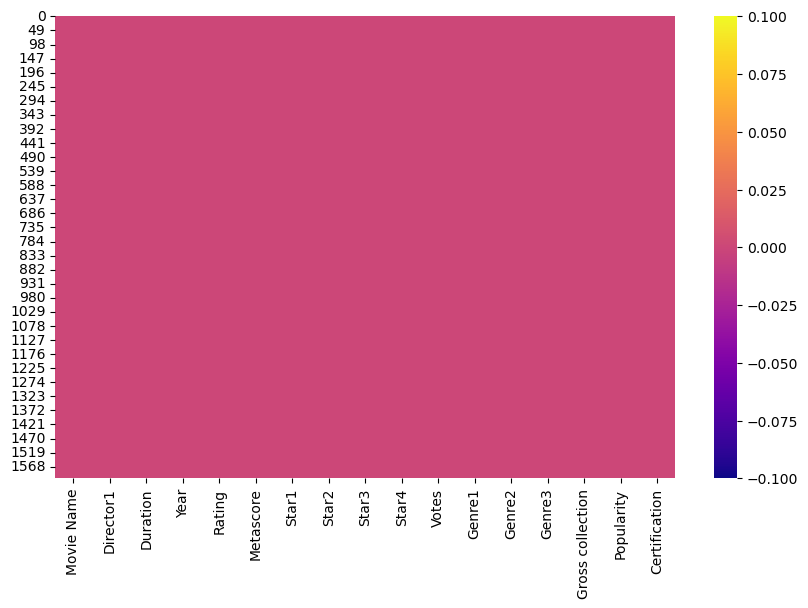

In [15]:
# Visualize the missing values using heat map
plt.figure(figsize = (10,6))
sns.heatmap(dff.isnull(), cmap = 'plasma')
plt.show()

In [16]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609 entries, 0 to 1608
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie Name        1609 non-null   object 
 1   Director1         1609 non-null   object 
 2   Duration          1609 non-null   float64
 3   Year              1609 non-null   int64  
 4   Rating            1609 non-null   float64
 5   Metascore         1609 non-null   float64
 6   Star1             1609 non-null   object 
 7   Star2             1609 non-null   object 
 8   Star3             1609 non-null   object 
 9   Star4             1609 non-null   object 
 10  Votes             1609 non-null   int64  
 11  Genre1            1609 non-null   object 
 12  Genre2            1609 non-null   object 
 13  Genre3            1609 non-null   object 
 14  Gross collection  1609 non-null   float64
 15  Popularity        1609 non-null   int64  
 16  Certification     1609 non-null   object 


In [17]:
# Loop through each columns and print unique values
for col in dff.columns:
    print("Unique values in {col}:")
    print(dff[col].unique())

Unique values in {col}:
['The Dark Knight' 'The Lord of the Rings: The Return of the King'
 'Spider-Man: Across the Spider-Verse' ... 'House of the Dead' 'Radhe'
 'Race 3']
Unique values in {col}:
['Christopher Nolan' 'Peter Jackson' 's:\nJoaquim Dos Santos'
 'Irvin Kershner' 'George Lucas' 'Hanu Raghavapudi' 'Ridley Scott'
 'Luc Besson' 's:\nBob Persichetti' 's:\nAnthony Russo' 'James Cameron'
 'Park Chan-wook' 'Lokesh Kanagaraj' 'Michael Mann' 'Richard Marquand'
 'Hayao Miyazaki' 'Alfred Hitchcock' 'Nitesh Tiwari' 'Rishab Shetty'
 'Prashanth Neel' 'Vishnuvardhan' 'Ram Kumar' 'Jon Watts'
 'Steven Spielberg' 'Sam Mendes' 'Quentin Tarantino' 'James McTeigue'
 'Akira Kurosawa' 'Haruo Sotozaki' 'Anurag Kashyap' 'Aditya Dhar'
 's:\nGayatri' 'Tigmanshu Dhulia' 'James Gunn' 'George Miller'
 'Gore Verbinski' 'James Mangold' "Gavin O'Connor" 'Ron Howard'
 'Guy Ritchie' 's:\nDean DeBlois' 'Brad Bird' 's:\nHideaki Anno'
 's:\nKabir Khan' 'Neeraj Pandey' 'Ramesh Sippy' 'Sashi Kiran Tikka'
 'John 

In [18]:
# Loop through each columns to get values count
for col in dff.columns:
    print("Value counts for  {col}:")
    print(dff[col].value_counts())

Value counts for  {col}:
Shaft                     4
Rollerball                4
Charlie's Angels          4
Get Carter                4
Assault on Precinct 13    4
                         ..
Crank                     1
Outlaw King               1
National Treasure         1
The World's End           1
Race 3                    1
Name: Movie Name, Length: 1524, dtype: int64
Value counts for  {col}:
Michael Bay           14
Paul W.S. Anderson    13
Roland Emmerich       12
Robert Rodriguez      12
Guy Ritchie           11
                      ..
Mike Newell            1
s:\nJohn McTiernan     1
Peter Faiman           1
Andrea Di Stefano      1
Remo D'Souza           1
Name: Director1, Length: 864, dtype: int64
Value counts for  {col}:
107.0    44
104.0    40
100.0    39
110.0    39
109.0    39
         ..
204.0     1
242.0     1
201.0     1
159.0     1
78.0      1
Name: Duration, Length: 115, dtype: int64
Value counts for  {col}:
2014    74
2016    71
2011    65
2018    64
2021    60


# Data Description

In [19]:
# Statistical Summary of the Numerical columns

dff.describe()

,Duration,Year,Rating,Metascore,Votes,Gross collection,Popularity
count,1609.000000,1609.000000,1609.000000,1609.000000,1.609000e+03,1.609000e+03,1609.000000
mean,115.602859,2006.396520,6.458856,48.296457,1.823420e+05,6.636436e+07,900.152268
std,21.340249,12.459013,0.967692,21.745755,2.312680e+05,9.765826e+07,506.081934
min,75.000000,1938.000000,1.900000,0.000000,2.500300e+04,0.000000e+00,1.000000
25%,100.000000,2000.000000,5.900000,37.000000,5.070000e+04,5.930000e+06,466.000000
50%,112.000000,2009.000000,6.500000,50.000000,1.034230e+05,3.467000e+07,905.000000
75%,127.000000,2016.000000,7.100000,64.000000,2.156440e+05,8.010000e+07,1344.000000
max,321.000000,2023.000000,9.000000,98.000000,2.751832e+06,9.366600e+08,1769.000000


This statistical summary of numerical columns include the count, mean, standard deviation, minimum value, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum value for each variable.

These statistics provide information about the distribution and range of values in each column of your dataset. They can be useful for understanding the central tendency, variability, and overall distribution of the data.

Breakdown of numerical columns' summary:

A. Rating:

1. count: The number of non-missing values in the 'Rating' column. There are 1609 values.
2. mean: The mean (average) of the 'Rating' values. The average rating is approximately 6.46.
3. std: The standard deviation of the 'Rating' values. The standard deviation measures the spread or dispersion of the ratings around the mean. It is approximately 0.97, indicating that the ratings are relatively close to the mean.
4. min: The minimum value of the 'Rating' column. The lowest rating is 1.9.
5. 25%: The 25th percentile of the 'Rating' column. This is the value below which 25% of the ratings fall. The 25th percentile rating is approximately 5.9.
6. 50%: The median of the 'Rating' column. The median is the middle value, and 50% of the ratings are below this value. The median rating is approximately 6.5.
7. 75%: The 75th percentile of the 'Rating' column. This is the value below which 75% of the ratings fall. The 75th percentile rating is approximately 7.1.
8. max: The maximum value of the 'Rating' column. The highest rating is 9.0.

B. Metascore:

1. count: The number of non-missing values in the 'Metascore' column. There are 1609 values.
2. mean: The mean (average) of the 'Metascore' values. The average Metascore is approximately 48.34.
3. std: The standard deviation of the 'Metascore' values. The standard deviation measures the spread or dispersion of the Metascores around the mean. It is approximately 21.72, indicating that the Metascores are relatively spread out.
4. min: The minimum value of the 'Metascore' column. The lowest Metascore is 0.0.
5. 25%: The 25th percentile of the 'Metascore' column. This is the value below which 25% of the Metascores fall. The 25th percentile Metascore is approximately 37.0.
6. 50%: The median of the 'Metascore' column. The median is the middle value, and 50% of the Metascores are below this value. The median Metascore is approximately 51.0.
7. 75%: The 75th percentile of the 'Metascore' column. This is the value below which 75% of the Metascores fall. The 75th percentile Metascore is approximately 64.0.
8. max: The maximum value of the 'Metascore' column. The highest Metascore is 98.0.

C. Votes:

1. count: The number of non-missing values in the 'Votes' column. There are 1609 values.
2. mean: The mean (average) of the 'Votes' values. The average number of votes is approximately 182,099.8.
3. std: The standard deviation of the 'Votes' values. The standard deviation measures the spread or dispersion of the votes around the mean. It is approximately 230,949.8, indicating that the votes are relatively spread out.
4. min: The minimum value of the 'Votes' column. The lowest number of votes is 25,031.
5. 25%: The 25th percentile of the 'Votes' column. This is the value below which 25% of the votes fall. The 25th percentile number of votes is approximately 50,684.
6. 50%: The median of the 'Votes' column. The median is the middle value, and 50% of the votes are below this value. The median number of votes is approximately 103,158.
7. 75%: The 75th percentile of the 'Votes' column. This is the value below which 75% of the votes fall. The 75th percentile number of votes is approximately 215,460.
8. max: The maximum value of the 'Votes' column. The highest number of votes is 2,746,399.

D. Gross collection:

1. count: The number of non-missing values in the 'Gross collection' column. There are 1609 values.
2. mean: The mean (average) of the 'Gross collection' values. The average gross collection is approximately 66,360,810.
3. std: The standard deviation of the 'Gross collection' values. The standard deviation measures the spread or dispersion of the gross collections around the mean. It is approximately 97,660,500, indicating that the gross collections are relatively spread out.
4. min: The minimum value of the 'Gross collection' column. The lowest gross collection is 0.
5. 25%: The 25th percentile of the 'Gross collection' column. This is the value below which 25% of the gross collections fall. The 25th percentile gross collection is approximately 5,900,000.
6. 50%: The median of the 'Gross collection' column. The median is the middle value, and 50% of the gross collections are below this value. The median gross collection is approximately 34,670,000.
7. 75%: The 75th percentile of the 'Gross collection' column. This is the value below which 75% of the gross collections fall. The 75th percentile gross collection is approximately 80,100,000.
8. max: The maximum value of the 'Gross collection' column. The highest gross collection is 936,660,000.

E. Duration:

1. count: The number of non-missing values in the 'Duration' column. There are 1609 values.
2. mean: The mean (average) of the 'Duration' values. The average duration is approximately 115.58 minutes.
3. std: The standard deviation of the 'Duration' values. The standard deviation measures the spread or dispersion of the durations around the mean. It is approximately 21.34 minutes, indicating that the durations are relatively spread out.
4. min: The minimum value of the 'Duration' column. The shortest duration is 75 minutes.
5. 25%: The 25th percentile of the 'Duration' column. This is the value below which 25% of the durations fall. The 25th percentile duration is approximately 100 minutes.
6. 50%: The median of the 'Duration' column. The median is the middle value, and 50% of the durations are below this value. The median duration is approximately 112 minutes.
7. 75%: The 75th percentile of the 'Duration' column. This is the value below which 75% of the durations fall. The 75th percentile duration is approximately 127 minutes.
8. max: The maximum value of the 'Duration' column. The longest duration is 321 minutes.

F. Year:

1. count: The number of non-missing values in the 'Year' column. There are 1609 values.
2. mean: The mean (average) of the 'Year' values. The average year is approximately 2006.36.
3. std: The standard deviation of the 'Year' values. The standard deviation measures the spread or dispersion of the years around the mean. It is approximately 12.53, indicating that the years are relatively spread out.
4. min: The minimum value of the 'Year' column. The earliest year is 1938.
5. 25%: The 25th percentile of the 'Year' column. This is the value below which 25% of the years fall. The 25th percentile year is approximately 2000.
6. 50%: The median of the 'Year' column. The median is the middle value, and 50% of the years are below this value. The median year is approximately 2009.
7. 75%: The 75th percentile of the 'Year' column. This is the value below which 75% of the years fall. The 75th percentile year is approximately 2016.
8. max: The maximum value of the 'Year' column. The latest year is 2023.

G. Popularity:

1. count: The number of non-missing values in the 'Popularity' column. There are 1609 values.
2. mean: The mean (average) of the 'Popularity' values. The average popularity score is approximately 900.14.
3. std: The standard deviation of the 'Popularity' values. The standard deviation measures the spread or dispersion of the popularity scores around the mean. It is approximately 506.09, indicating that the popularity scores are relatively spread out.
4. min: The minimum value of the 'Popularity' column. The lowest popularity score is 1.
5. 25%: The 25th percentile of the 'Popularity' column. This is the value below which 25% of the popularity scores fall. The 25th percentile popularity score is approximately 467.
6. 50%: The median of the 'Popularity' column. The median is the middle value, and 50% of the popularity scores are below this value. The median popularity score is approximately 904.
7. 75%: The 75th percentile of the 'Popularity' column. This is the value below which 75% of the popularity scores fall. The 75th percentile popularity score is approximately 1344.
8. max: The maximum value of the 'Popularity' column. The highest popularity score is 1769.

# Data Visualization - Graphical Analysis

Here we will be performing data visualization techniques like Univariate, Bivariate , and Multivariate analysis to visually explore and analyze the data. It will helps us in gaining the insights into the patterns,distribution, and relatioship present in dataset. For plotting different graphs we wil be import seaborn and matplotlib Python libraries. By creating various plots, we can easly visualize the data

# Univariate Analysis

Year(Movie Release) Distribution

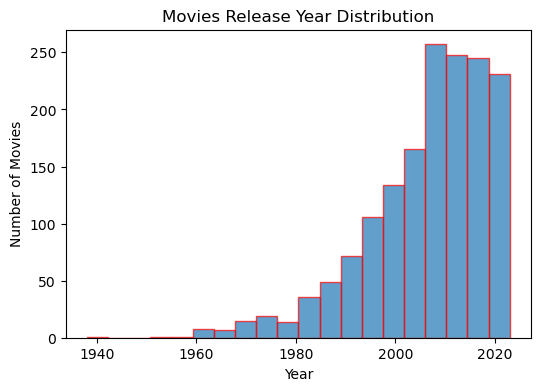

In [20]:
# Plot a histogram to visualize the distribution of movie releases across different years
plt.figure(figsize = (6,4))
plt.hist(dff['Year'], bins = 20, edgecolor = 'red', alpha = 0.7)
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Movies Release Year Distribution')
plt.show()

Here in this year distribution plot we can see the peak is in between 2000-2020, and distribution is left skewed.

Rating(Movie rating)

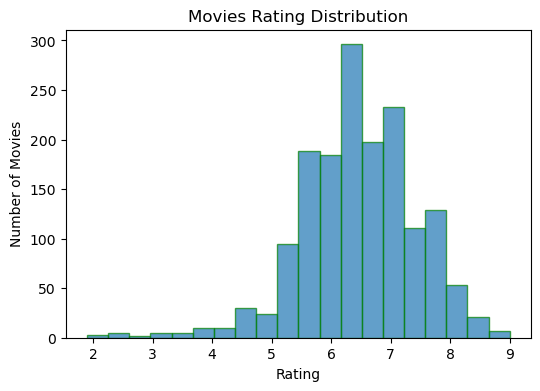

In [21]:
# Plot a histogram to visualize the distribution of movie ratings
plt.figure(figsize = (6,4))
plt.hist(dff['Rating'], bins = 20, edgecolor = 'green', alpha = 0.7)
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Movies Rating Distribution')
plt.show()

Here in this rating plot, we can analyze the slightly left skewed distribution with peak value lies between 6-7.

Duration(Movie) Distribution

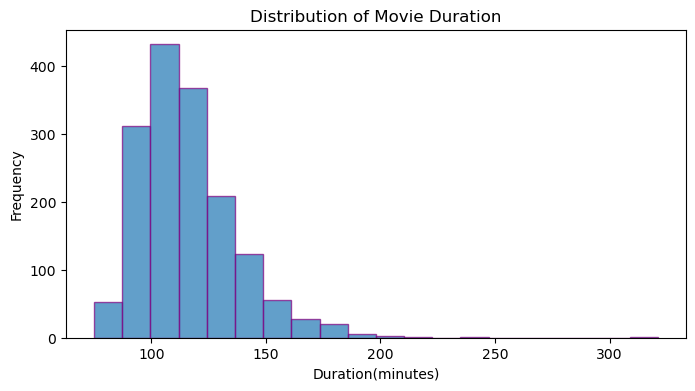

In [22]:
# Plot a histogram to visualize the frequency of movie duration
plt.figure(figsize = (8,4))
plt.hist(dff['Duration'], bins = 20, edgecolor = 'purple', alpha = 0.7)
plt.xlabel('Duration(minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Duration')
plt.show()

Here we can visualize in the plot that the distribution is rightly skewed with the peak value is around 100.

Metascore Distribution

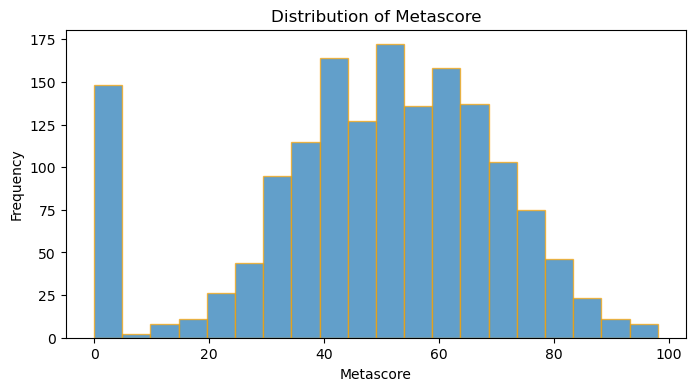

In [23]:
# Plot a histogram to visualize the frequency of movie duration
plt.figure(figsize = (8,4))
plt.hist(dff['Metascore'], bins = 20, edgecolor = 'orange', alpha = 0.7)
plt.xlabel('Metascore')
plt.ylabel('Frequency')
plt.title('Distribution of Metascore')
plt.show()

Here we can visualize in this metascore plot that the distribution is bimodal with the peak value is in between 40-60.

Votes Distribution

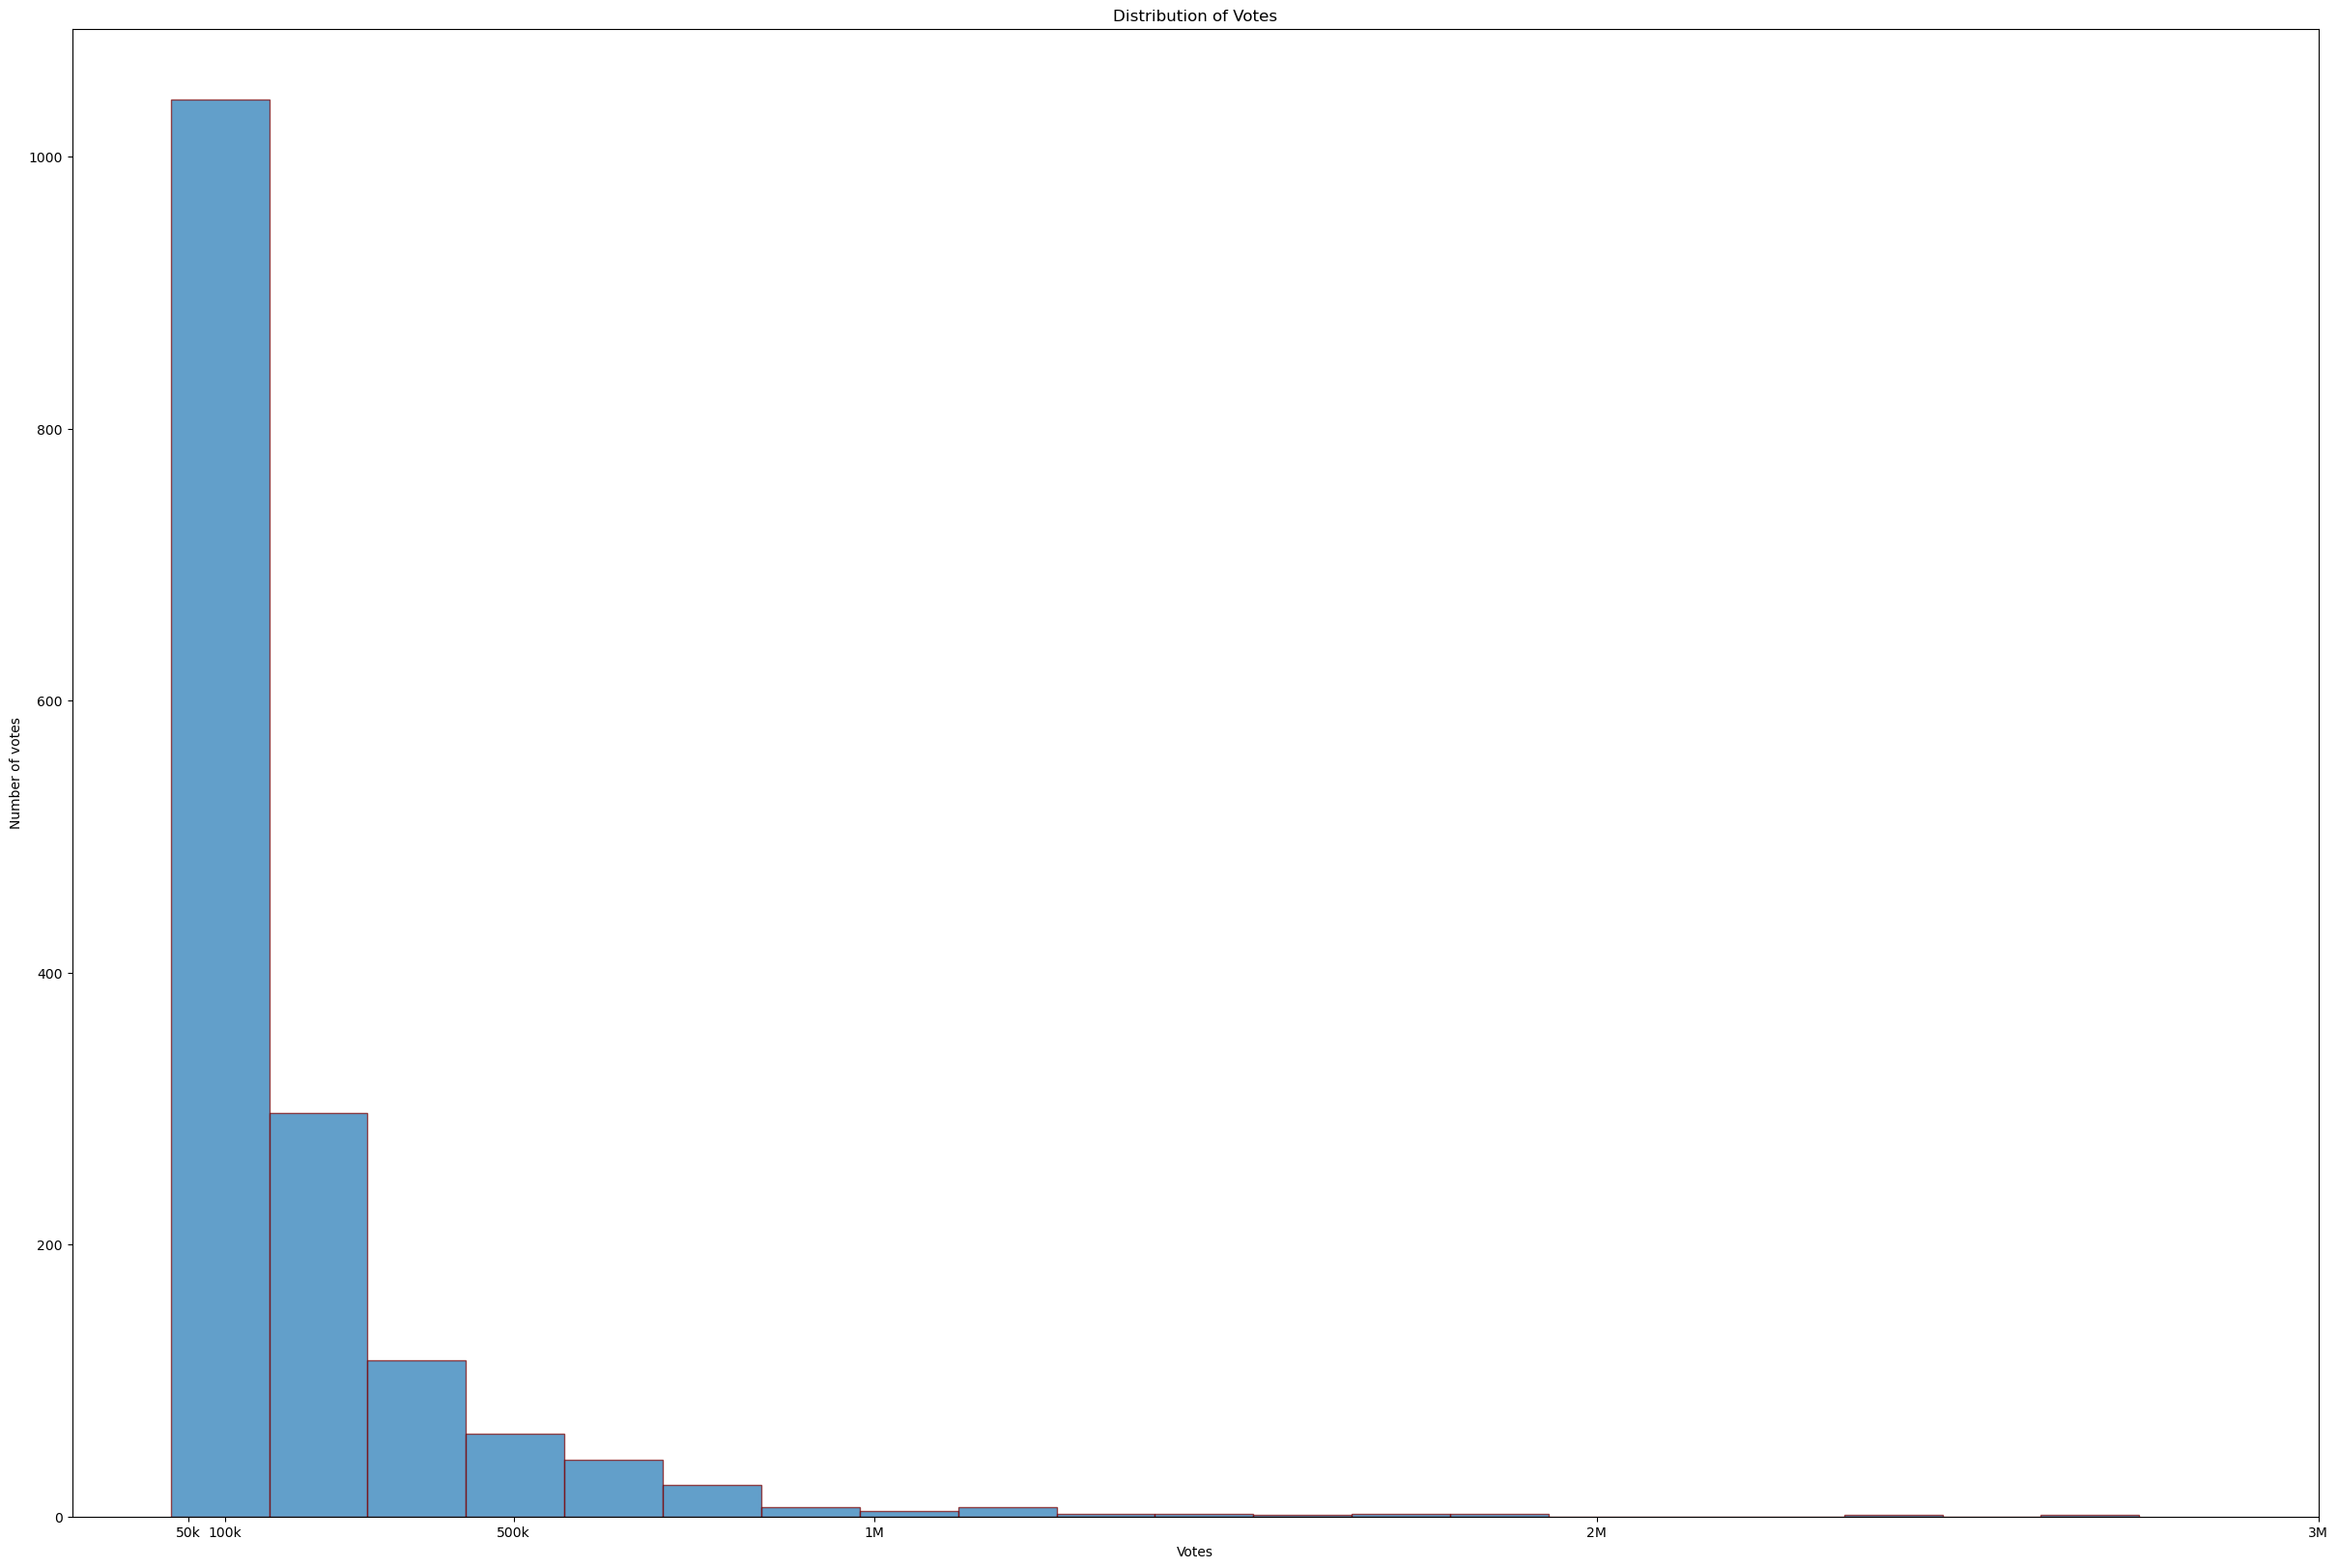

In [24]:
# Plot a histogram to visualize the frequency of votes
plt.figure(figsize = (30,20))
plt.hist(dff['Votes'], bins = 20, edgecolor = 'maroon', alpha = 0.7)
plt.xlabel('Votes')
plt.ylabel('Number of votes')

# Define the custom tick and labels for X-axis
custom_ticks = [50000, 100000, 500000, 1000000, 2000000, 3000000]
custom_labels = ['50k', '100k', '500k', '1M', '2M', '3M']
plt.xticks(custom_ticks, custom_labels)
plt.title('Distribution of Votes')
plt.show()

Here we can visualize the distribution is heavely right skewed with peak value around 100k.

Gross Collection distribution

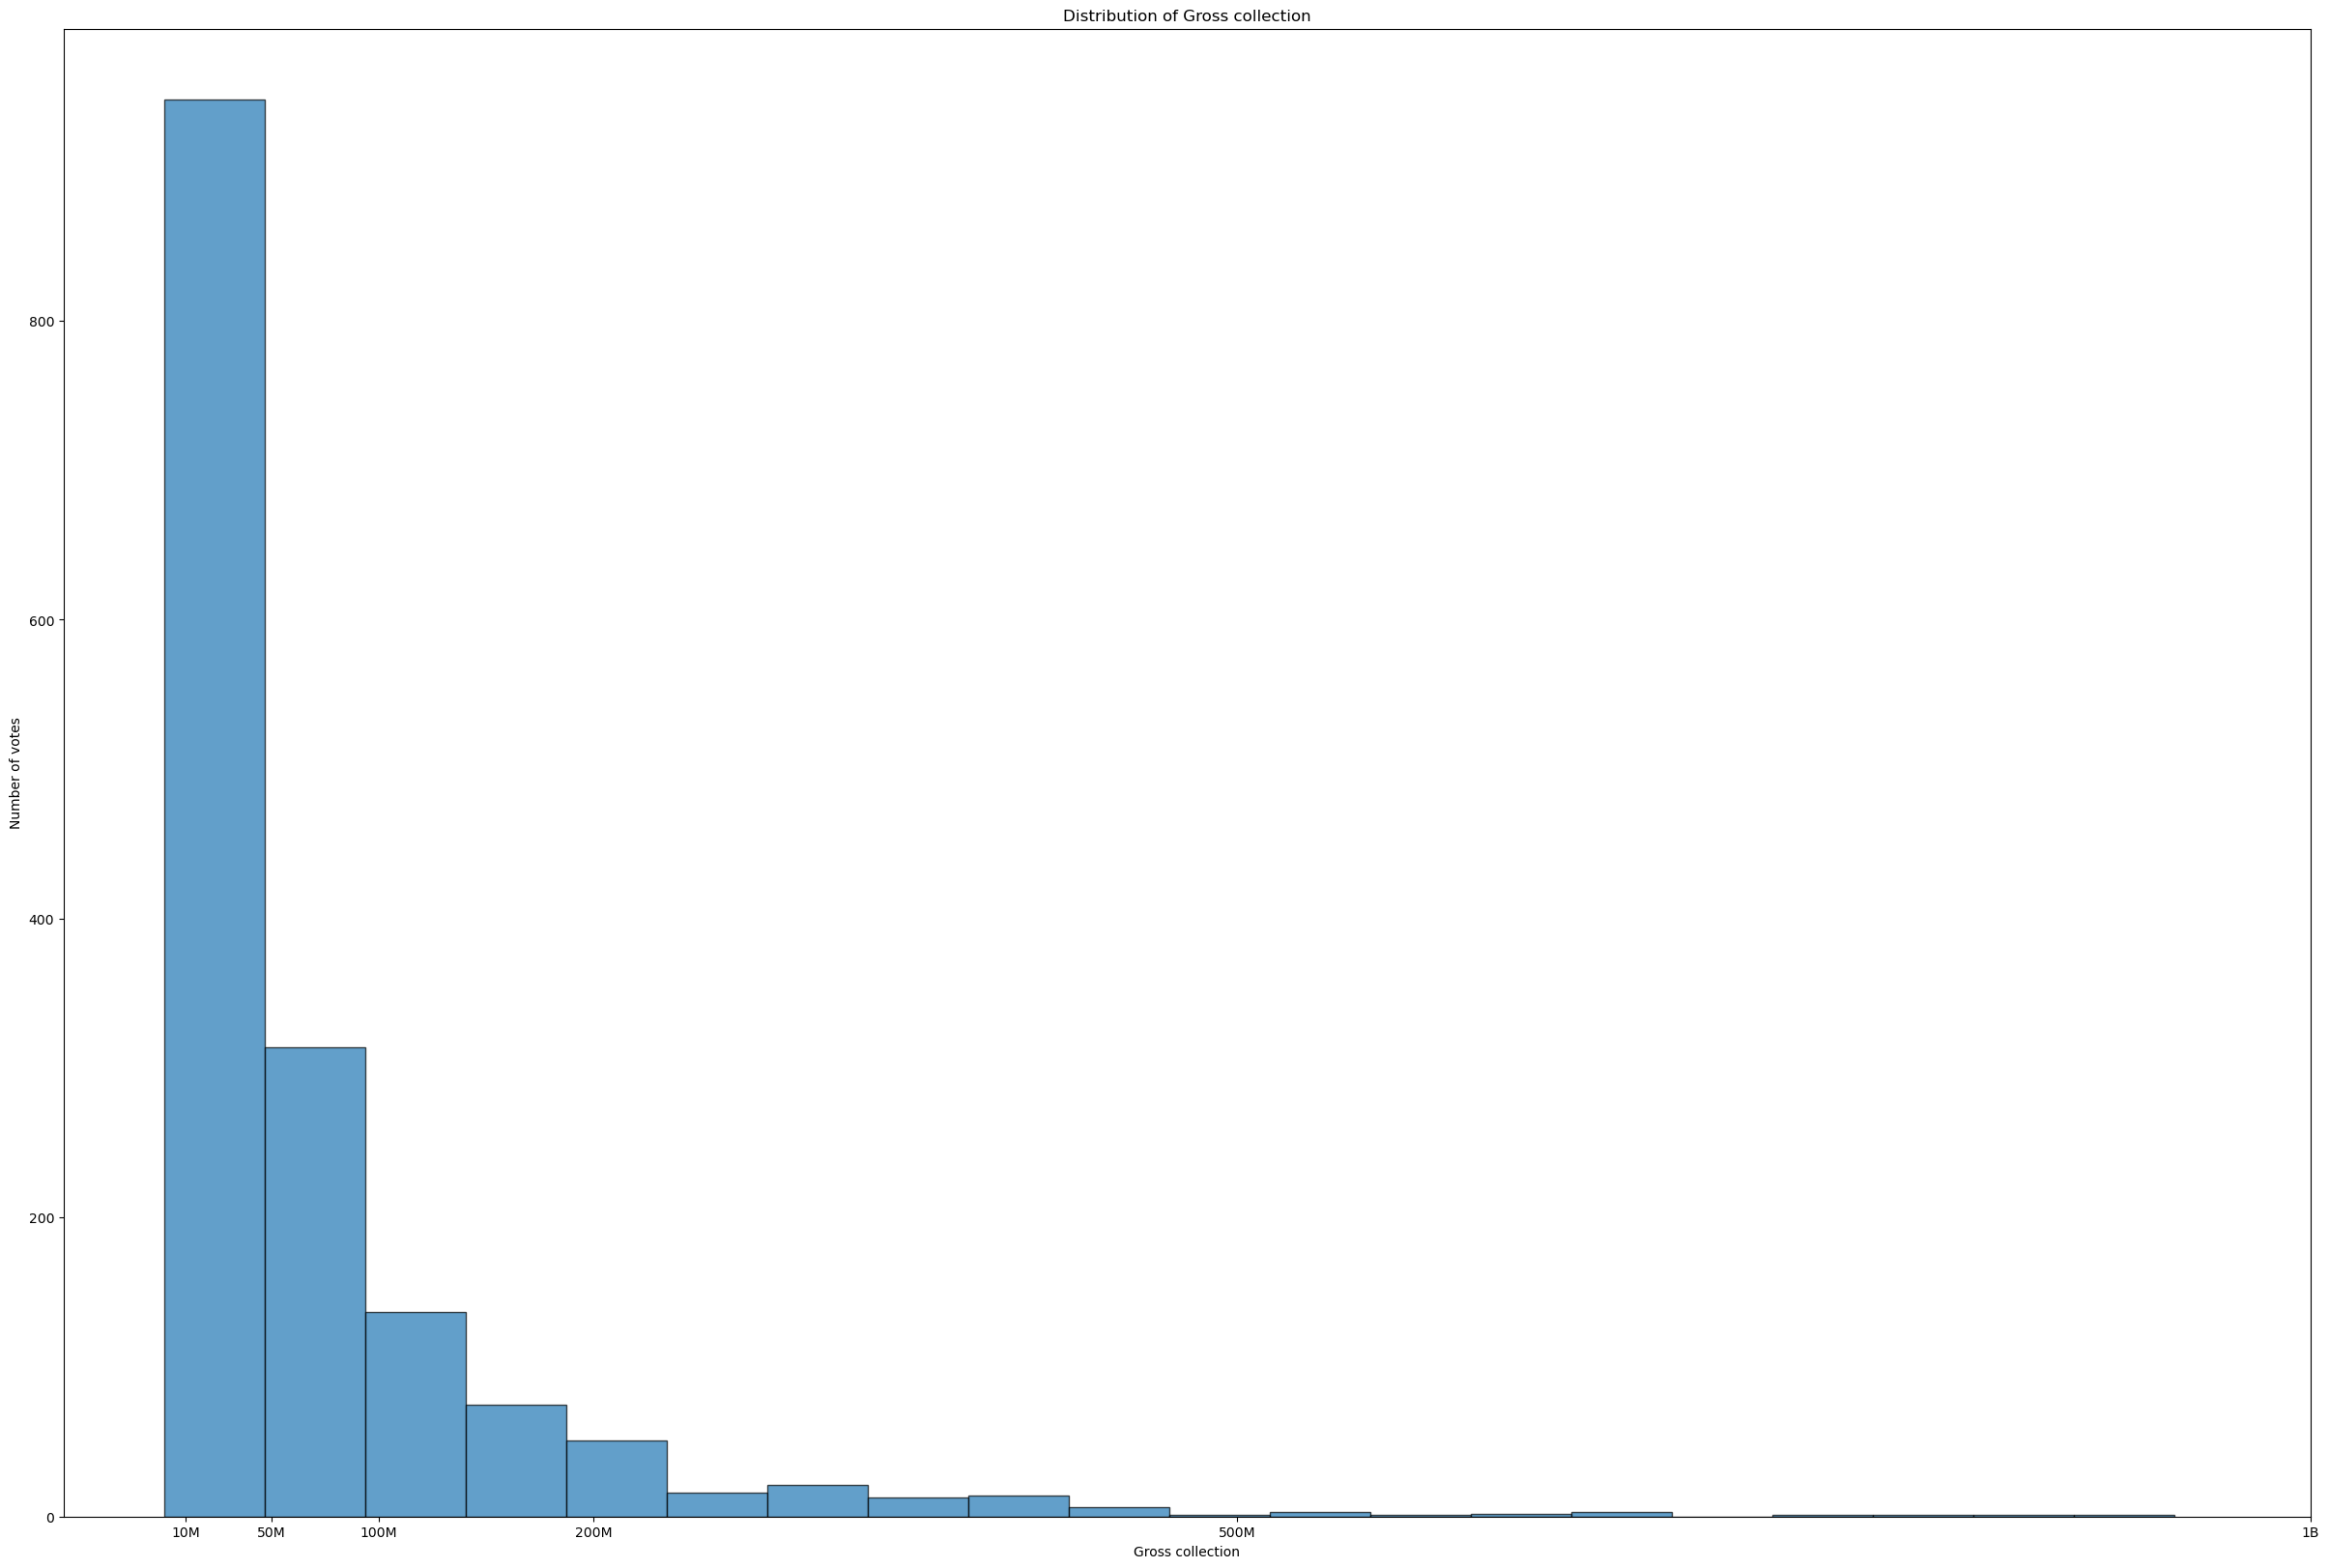

In [25]:
# Plot a histogram to visualize the gross collection distribution
plt.figure(figsize = (30,20))
plt.hist(dff['Gross collection'], bins = 20, edgecolor = 'black', alpha = 0.7)
plt.xlabel('Gross collection')
plt.ylabel('Number of votes')

# Define the custom tick and labels for X-axis
custom_ticks = [10000000, 50000000, 100000000, 200000000, 500000000, 1000000000]
custom_labels = ['10M', '50M', '100M', '200M', '500M', '1B']
plt.xticks(custom_ticks, custom_labels)
plt.title('Distribution of Gross collection')
plt.show()

Here in this analysis plot we can see the distribution of gross collection is rightly skewed with peak is around 10M.

Genre 1 

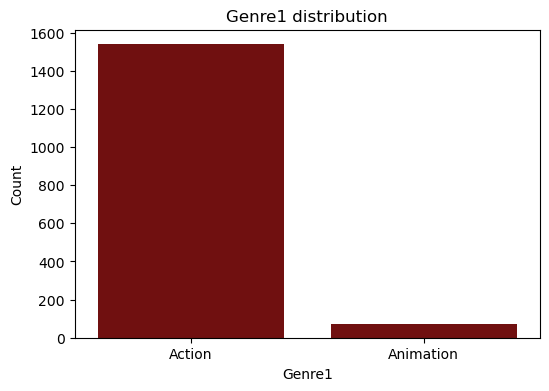

In [26]:
# Lets analyze the 'Genre1' column by using bar plot
plt.figure(figsize = (6,4))
sns.countplot(x = 'Genre1', data = dff, color = 'maroon')
plt.xlabel('Genre1')
plt.ylabel('Count')
plt.title('Genre1 distribution')
plt.show()

In this plot of Genre1 we can visualize that the count of movies with Genre 'Action' is higher then 'Animation'.

Genre2

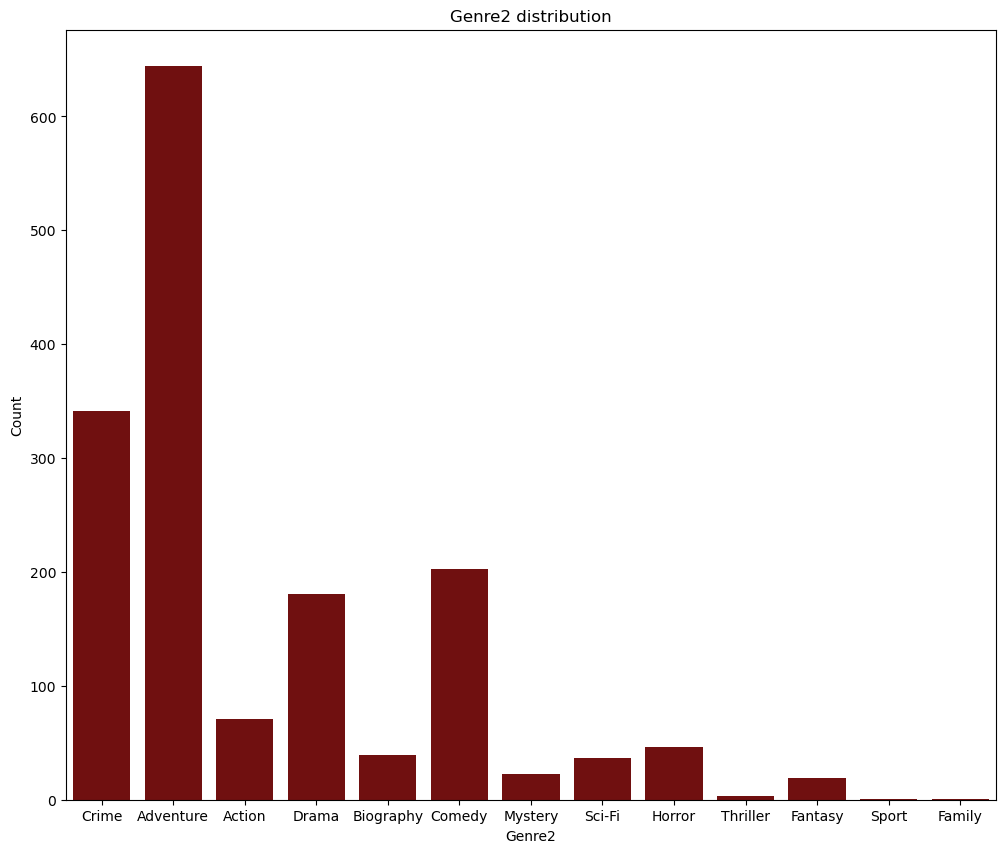

In [27]:
# Lets analyze the 'Genre2' column by using bar plot
plt.figure(figsize = (12,10))
sns.countplot(x = 'Genre2', data = dff, color = 'maroon')
plt.xlabel('Genre2')
plt.ylabel('Count')
plt.title('Genre2 distribution')
plt.show()

Here in this analysis plot of 'Genre2', the count of movies with 'Adventure' genre is the highest among all followed by 'Crime' genre.

Genre3

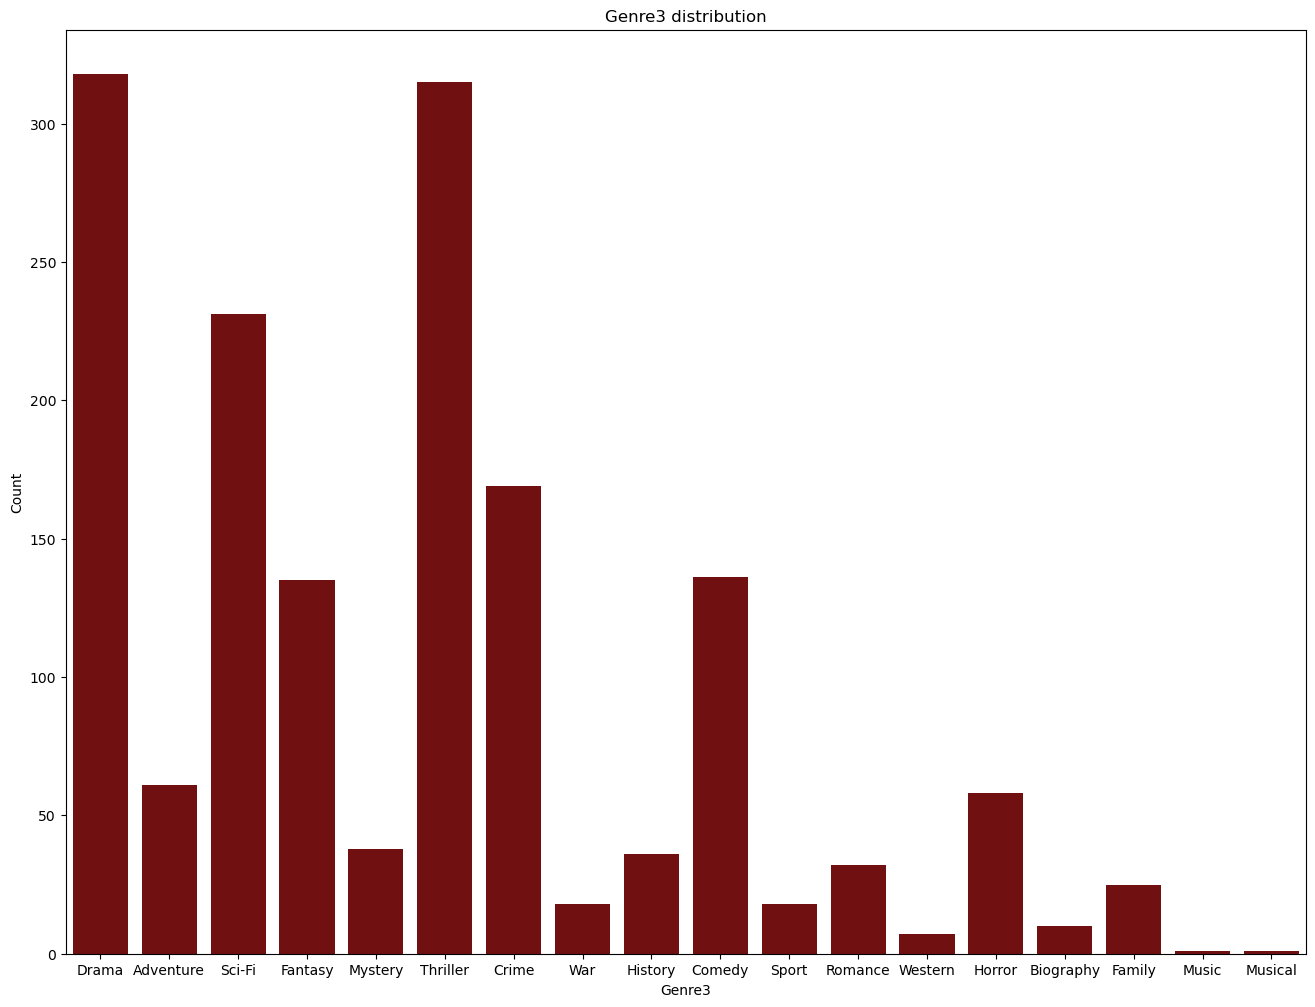

In [28]:
# Lets analyze the 'Genre3' column by using bar plot
plt.figure(figsize = (16,12))
sns.countplot(x = 'Genre3', data = dff, color = 'maroon')
plt.xlabel('Genre3')
plt.ylabel('Count')
plt.title('Genre3 distribution')
plt.show()

In this analysis plot of 'Genre3' the count of movies with 'Drama' is highest followed by 'Thriller' genre.

Certification

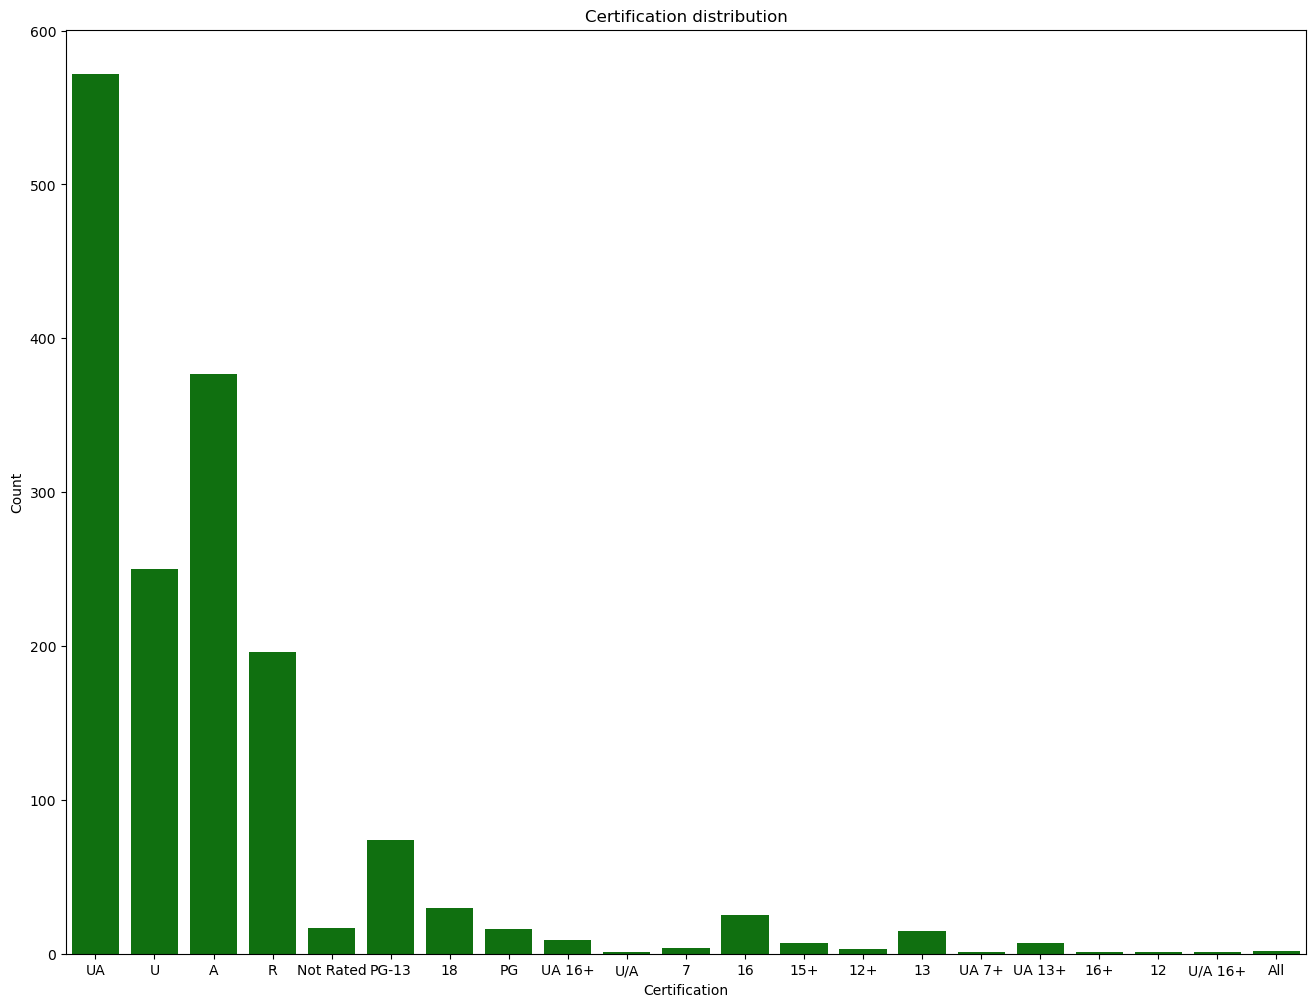

In [29]:
# Lets analyze the 'Certification' column by using bar plot
plt.figure(figsize = (16,12))
sns.countplot(x = 'Certification', data = dff, color = 'green')
plt.xlabel('Certification')
plt.ylabel('Count')
plt.title('Certification distribution')
plt.show()

Here this analysis plot of 'Certification' we can see the count of movies with 'UA' certification is the highest followed by 'A'.

# Bivariate Analysis

Votes & Rating

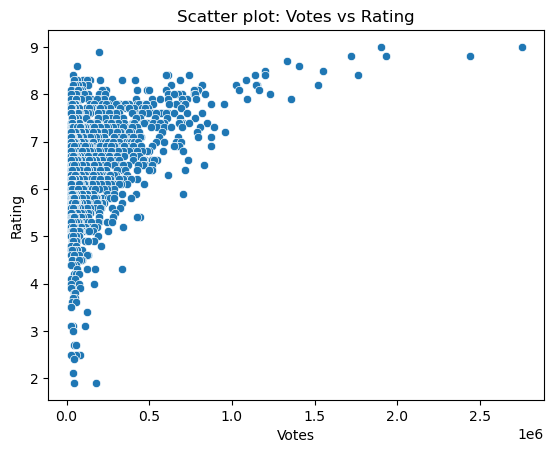

In [30]:
# Lets visualize the columns

sns.scatterplot(data=dff, x="Votes", y="Rating")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.title("Scatter plot: Votes vs Rating")
plt.show()

Here we can see the weak positive relation between two variable.

Votes & Metascore

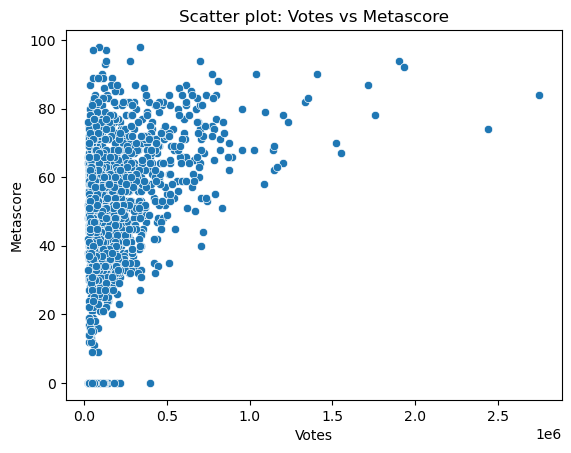

In [31]:
# Lets visualize the columns

sns.scatterplot(data=dff, x="Votes", y="Metascore")
plt.xlabel("Votes")
plt.ylabel("Metascore")
plt.title("Scatter plot: Votes vs Metascore")
plt.show()

Here too we can analyze the positive weak relation between the variable.

Votes & Genre1

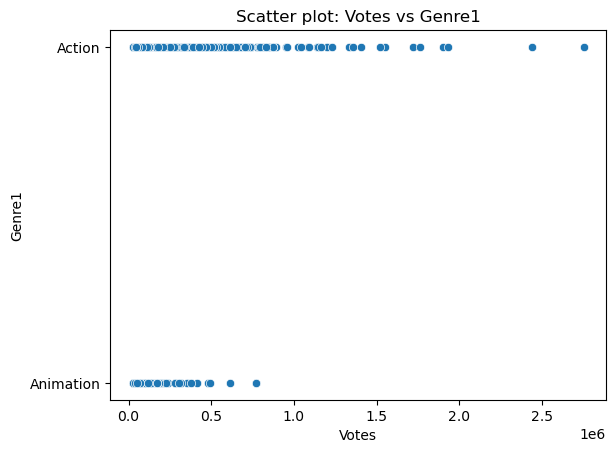

In [32]:
# Lets visualize the columns

sns.scatterplot(data=dff, x="Votes", y="Genre1")
plt.xlabel("Votes")
plt.ylabel("Genre1")
plt.title("Scatter plot: Votes vs Genre1")
plt.show()

Here we can see positive relation between the variables

Votes & Genre2

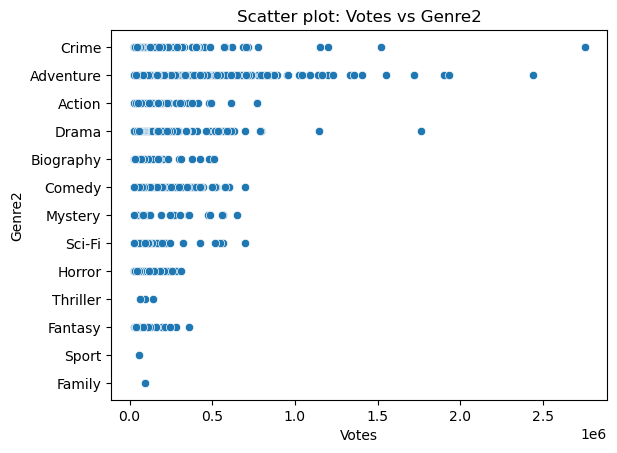

In [33]:
# Lets visualize the columns

sns.scatterplot(data=dff, x="Votes", y="Genre2")
plt.xlabel("Votes")
plt.ylabel("Genre2")
plt.title("Scatter plot: Votes vs Genre2")
plt.show()

Here too positive relation is seen

Votes & Genre3

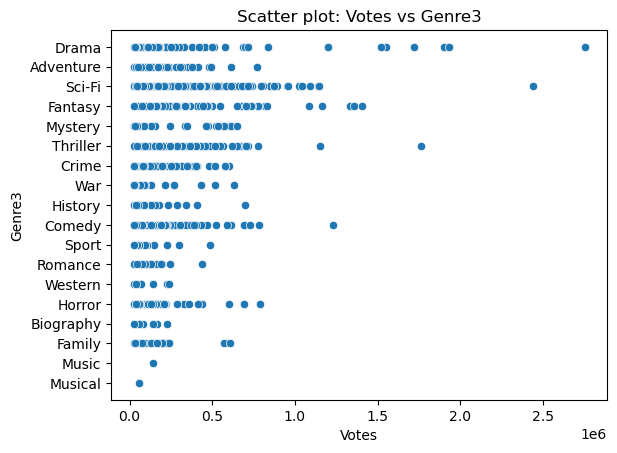

In [34]:
# Lets visualize the columns

sns.scatterplot(data=dff, x="Votes", y="Genre3")
plt.xlabel("Votes")
plt.ylabel("Genre3")
plt.title("Scatter plot: Votes vs Genre3")
plt.show()

Here too we can see positive relation between variables.

Votes & Certification

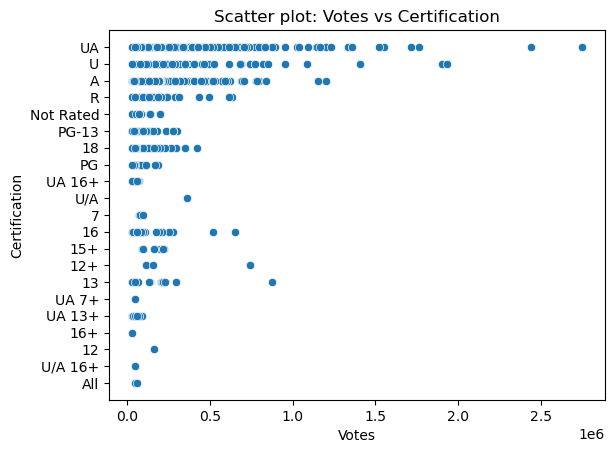

In [35]:
# Lets visualize the columns

sns.scatterplot(data=dff, x="Votes", y="Certification")
plt.xlabel("Votes")
plt.ylabel("Certification")
plt.title("Scatter plot: Votes vs Certification")
plt.show()

Here its showing weak relation.

Votes & Popularity

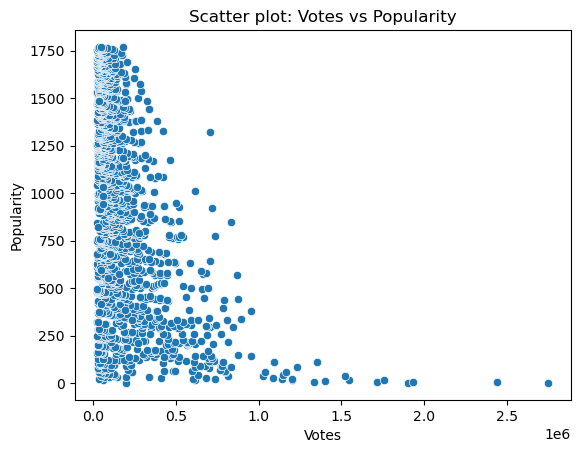

In [36]:
# Lets visualize the columns

sns.scatterplot(data=dff, x="Votes", y="Popularity")
plt.xlabel("Votes")
plt.ylabel("Popularity")
plt.title("Scatter plot: Votes vs Popularity")
plt.show()

This plot is showing null relation.

Gross collection & Rating

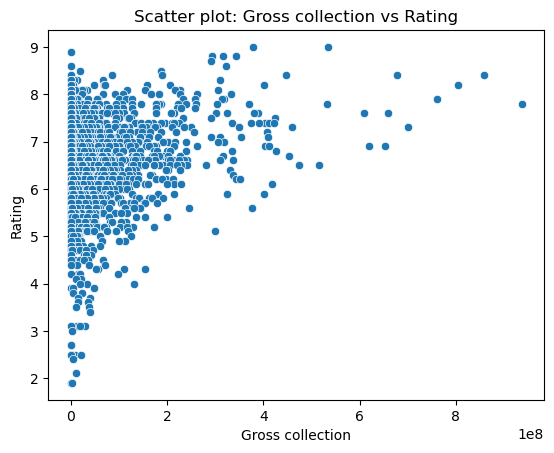

In [37]:
# Lets visualize the columns

sns.scatterplot(data=dff, x="Gross collection", y="Rating")
plt.xlabel("Gross collection")
plt.ylabel("Rating")
plt.title("Scatter plot: Gross collection vs Rating")
plt.show()

Here in this plot we can see weak positive relation.

Gross collection & Metascore

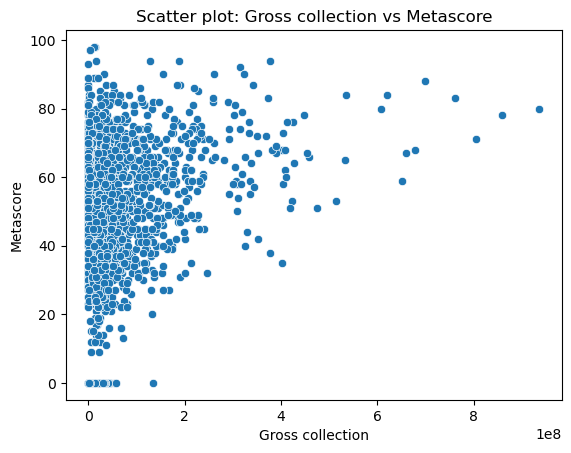

In [38]:
# Lets visualize the columns

sns.scatterplot(data=dff, x="Gross collection", y="Metascore")
plt.xlabel("Gross collection")
plt.ylabel("Metascore")
plt.title("Scatter plot: Gross collection vs Metascore")
plt.show()

here too we can see positive but weak relation.

Gross collection & Genre1

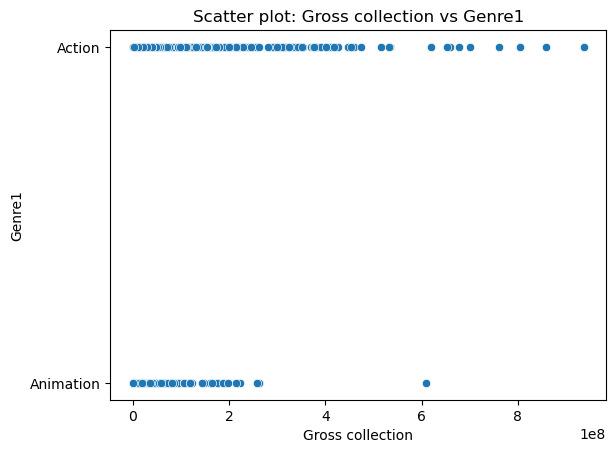

In [39]:
# Lets visualize the columns

sns.scatterplot(data = dff, x = "Gross collection", y = "Genre1")
plt.xlabel("Gross collection")
plt.ylabel("Genre1")
plt.title("Scatter plot: Gross collection vs Genre1")
plt.show()

Here in this lot we can see the positive realtion of variable.

Gross collection & Genre2

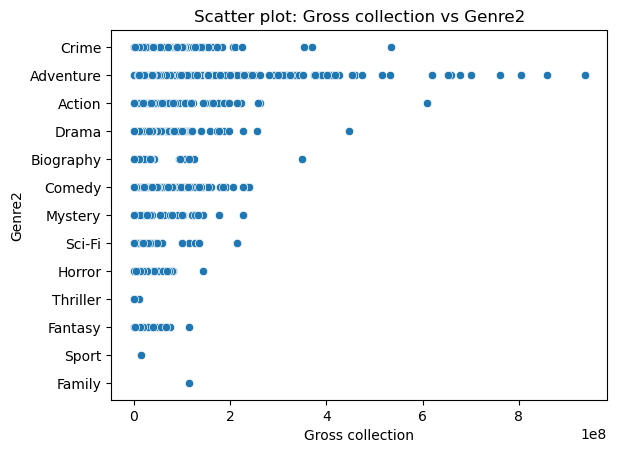

In [40]:
# Lets visualize the columns

sns.scatterplot(data = dff, x = "Gross collection", y = "Genre2")
plt.xlabel("Gross collection")
plt.ylabel("Genre2")
plt.title("Scatter plot: Gross collection vs Genre2")
plt.show()

Here in this plot too we can see positive relation between the variable.

Gross collection & Genre3

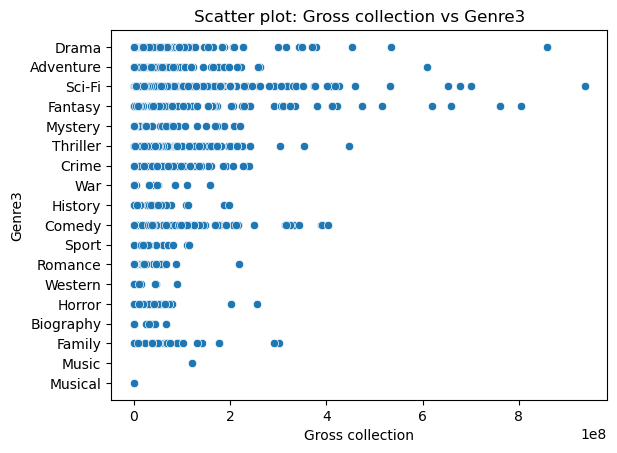

In [41]:
# Lets visualize the columns

sns.scatterplot(data = dff, x = "Gross collection", y = "Genre3")
plt.xlabel("Gross collection")
plt.ylabel("Genre3")
plt.title("Scatter plot: Gross collection vs Genre3")
plt.show()

Here too we can see the positive relation of varibles.

Gross collection & Certification

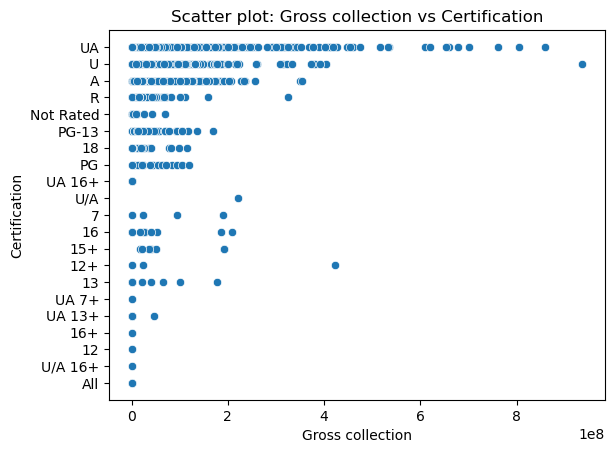

In [42]:
# Lets visualize the columns

sns.scatterplot(data = dff, x = "Gross collection", y = "Certification")
plt.xlabel("Gross collection")
plt.ylabel("Certification")
plt.title("Scatter plot: Gross collection vs Certification")
plt.show()

Here in this plot few values shows strong positive linear relation while few shows weak and few shows null relation.

Gross collection & Popularity

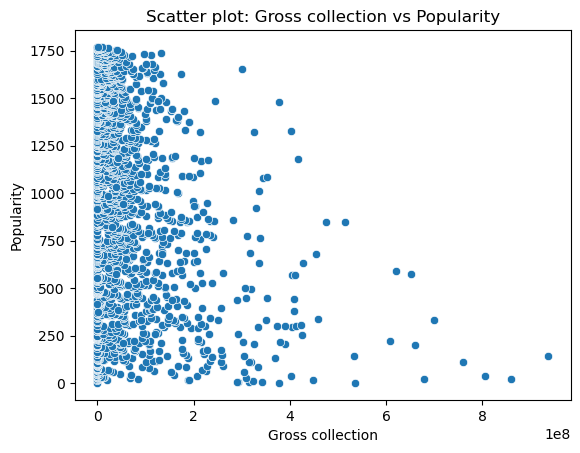

In [43]:
# Lets visualize the columns

sns.scatterplot(data=dff, x="Gross collection", y="Popularity")
plt.xlabel("Gross collection")
plt.ylabel("Popularity")
plt.title("Scatter plot: Gross collection vs Popularity")
plt.show()

This plot shows weak relation.

# Multivariate Analysis

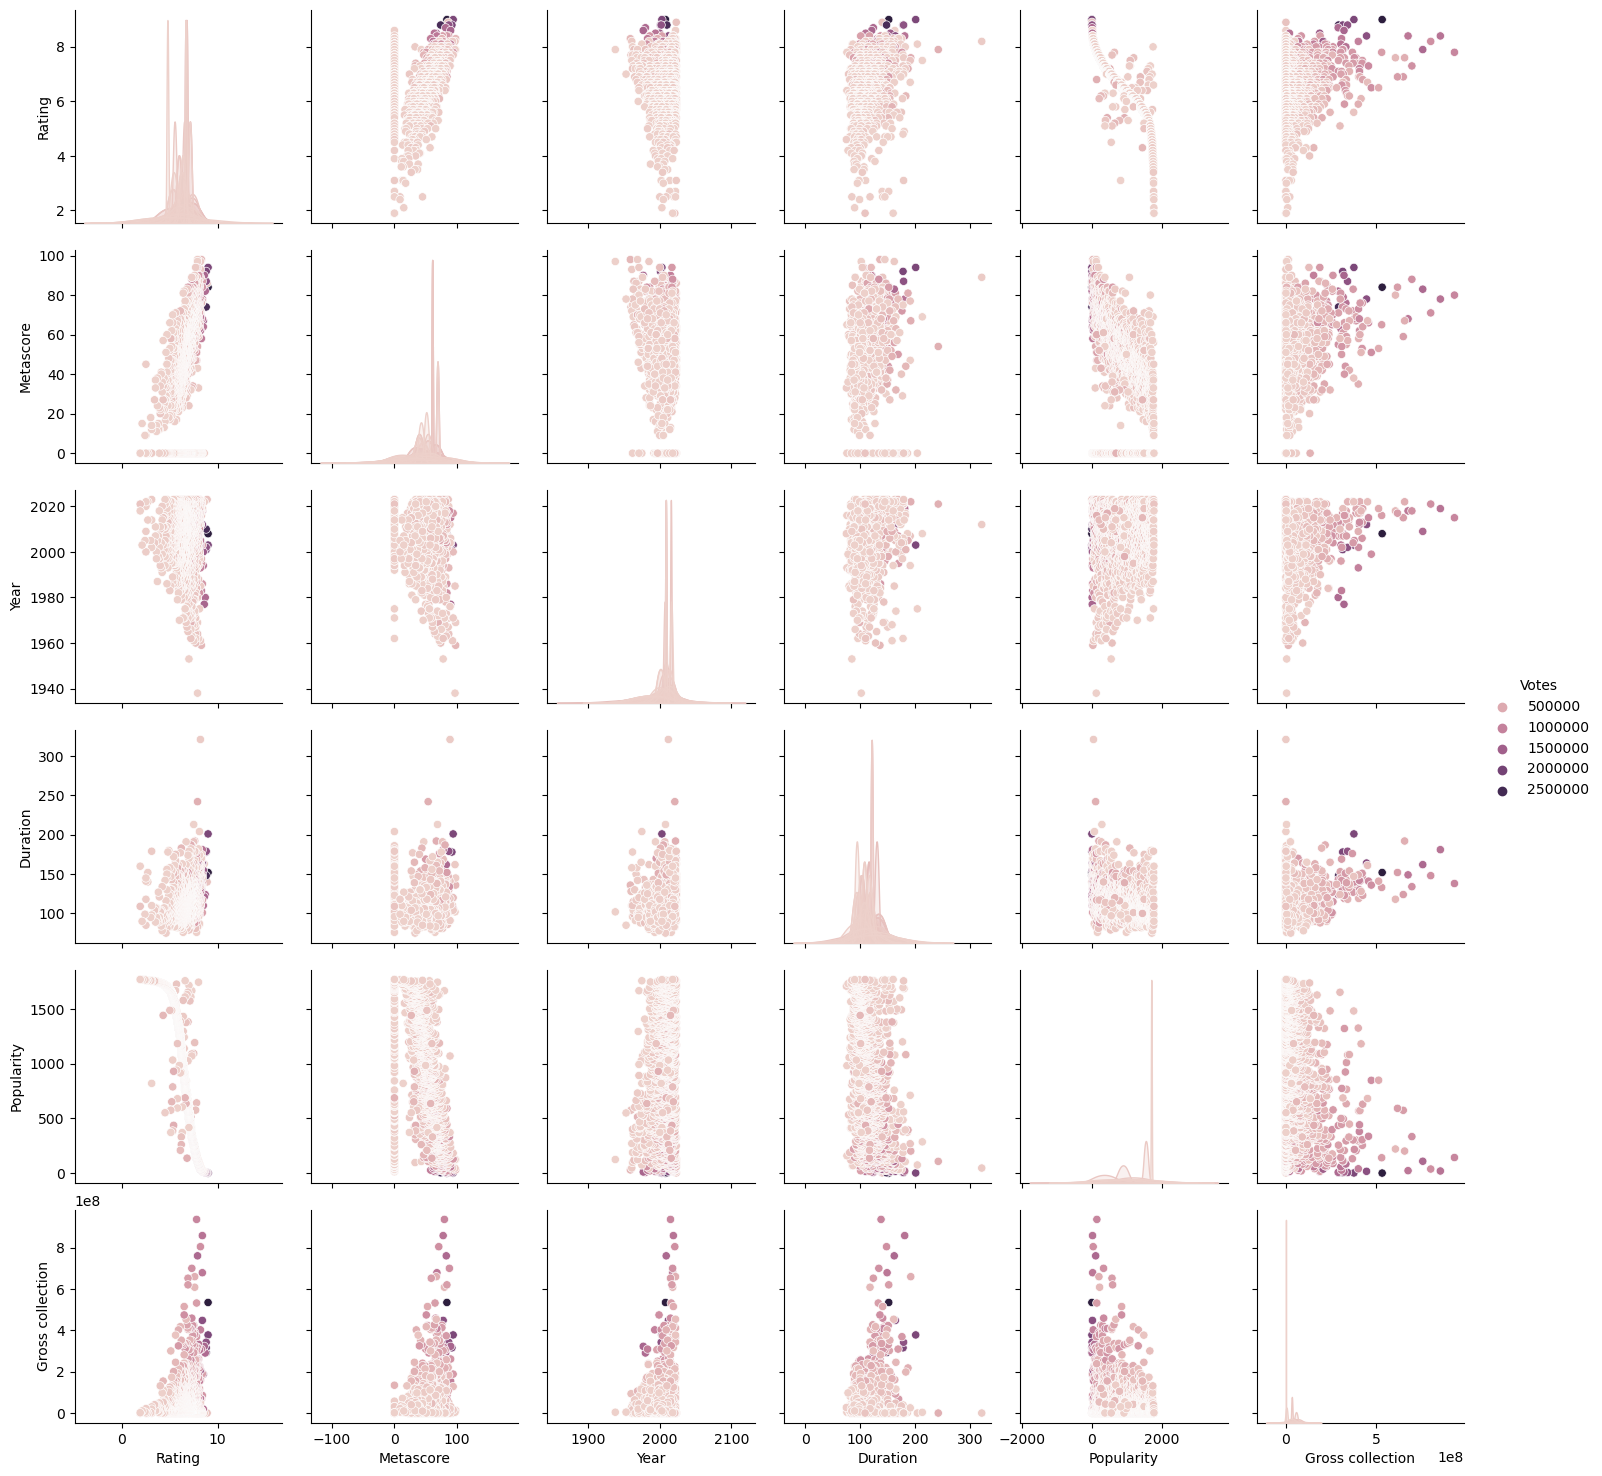

In [44]:
# Using Pairplot
subset_vars = ['Rating', 'Metascore', 'Year', 'Duration','Genre1', 'Genre2', 'Genre3', 'Popularity', 'Certification', 'Gross collection', 'Votes']
sns.pairplot(data = dff[subset_vars], hue = 'Votes')
plt.show()

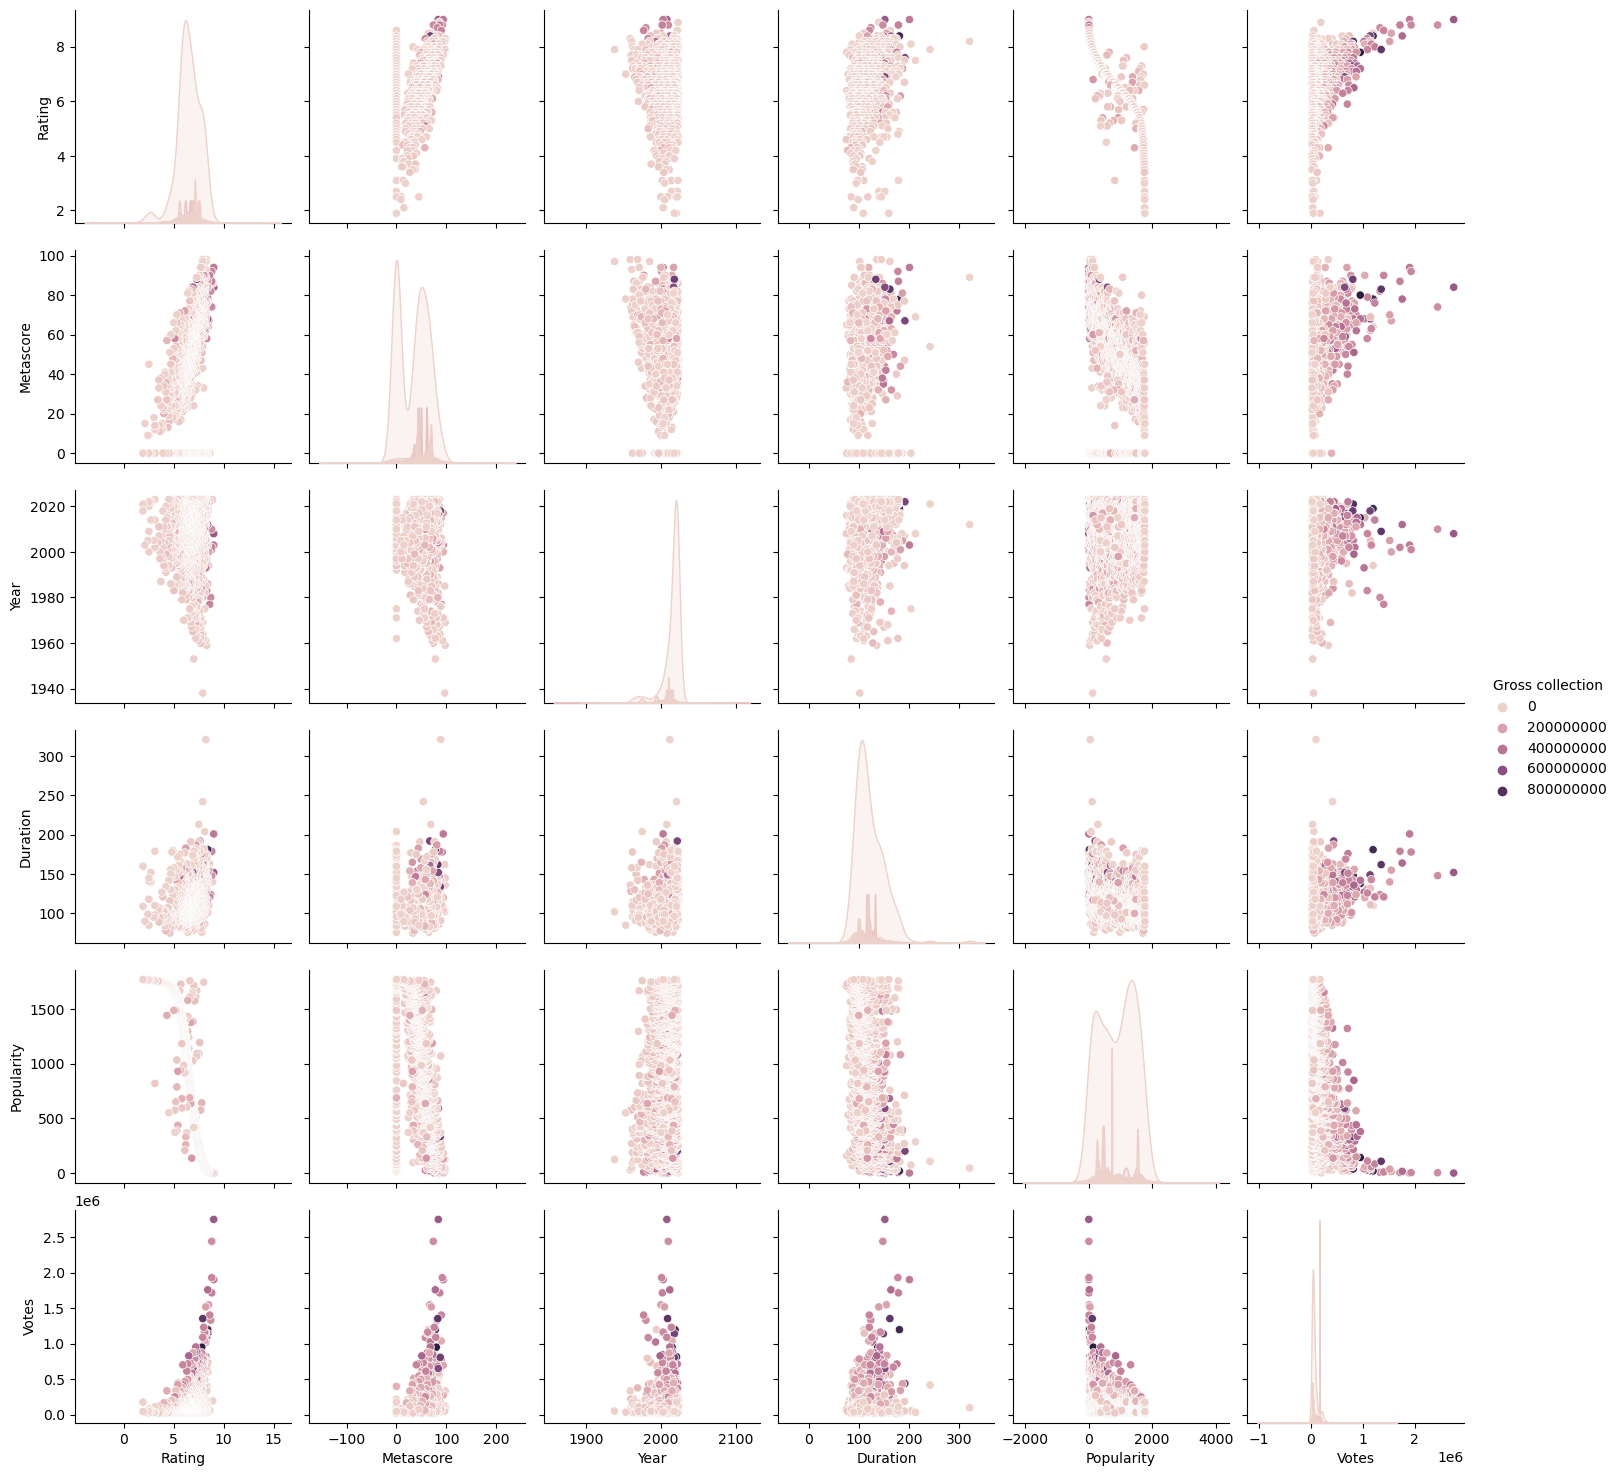

In [45]:
# Using Pairplot
subset_vars = ['Rating', 'Metascore','Year', 'Duration','Genre1', 'Genre2', 'Genre3', 'Popularity', 'Certification', 'Votes', 'Gross collection']
sns.pairplot(data = dff[subset_vars], hue = 'Gross collection')
plt.show()

# Data Preprocessing

Here in this preprocessing step, we will be checking data with outliers, skewness , and will handle them using the different or suitable required technique. We will be encoding categorical columns so that it will be easy for prediction. After that we will check the correlation and will do some feature engineering to know the suitable features for predictions and visualize that by using heatmap.

# Outliers

Here first we will check all the numerical columns to check the presence of outliers there and then will proceed with handling them either by treating them or by removing them.

We will be using winsorizing method first to treat outliers and then will be using clip() function to limit the extreme values. By cliping these extreme values we will be setting boundaries to prevent extremely high or low values from skewing the data for analysisresults. This will help us here ti mitigate the impact of outliers and extreme observations on the analysis.

For this we will be importing necessary library first from scipy.stats.mstats

Winsorizing Method: Winsorizing is a data transformation technique used to handle outliers or extreme values in a dataset. It involves replacing extreme values with less extreme values, thereby reducing the impact of outliers on statistical analysis. In winsorizing, we will be trimming or censoring the extreme values by replacing them with the value which is closer to rest of the data. It helps in reducoing the impact of outliers on the statistical measures and provides a more robust analysis.It ensures that extreme values do not unduly influence the results or skew the distribution of the data.

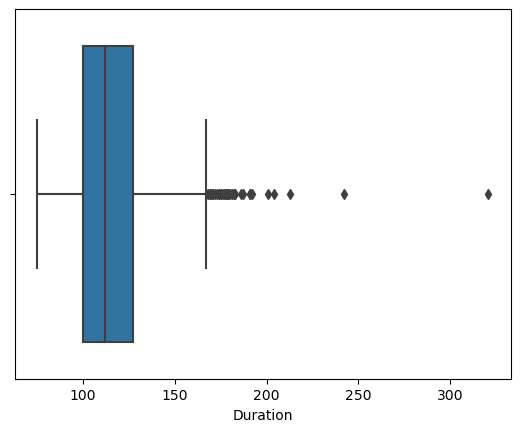

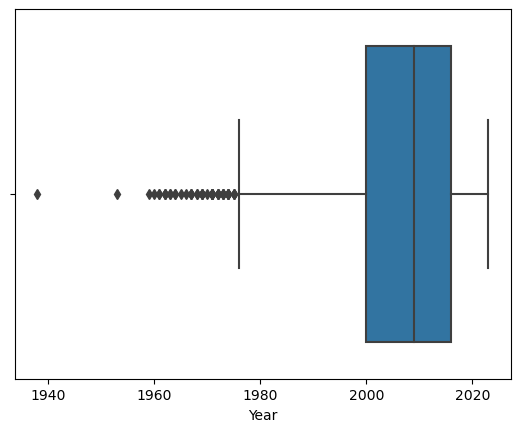

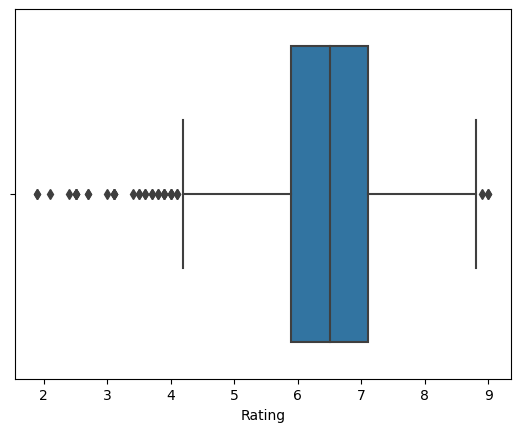

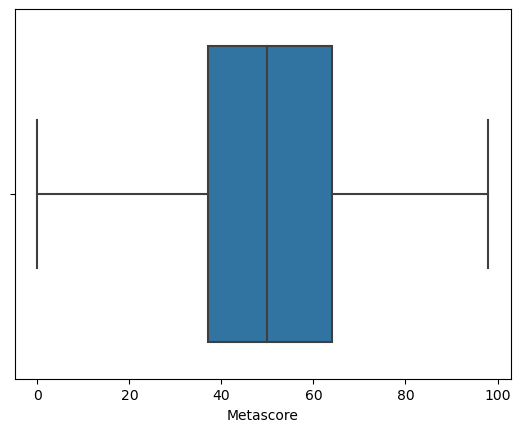

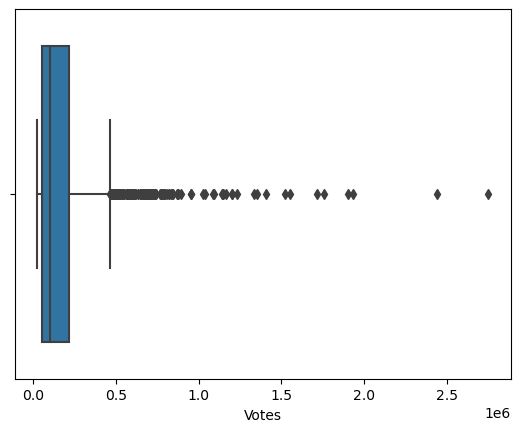

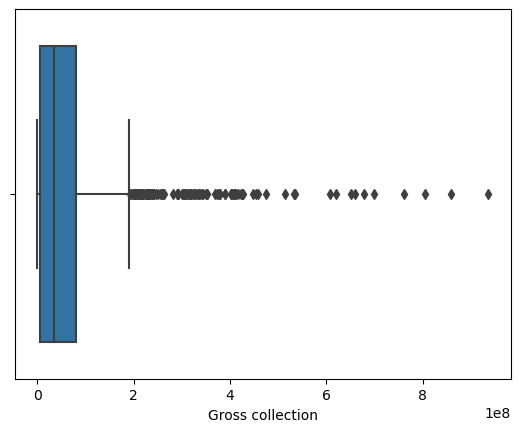

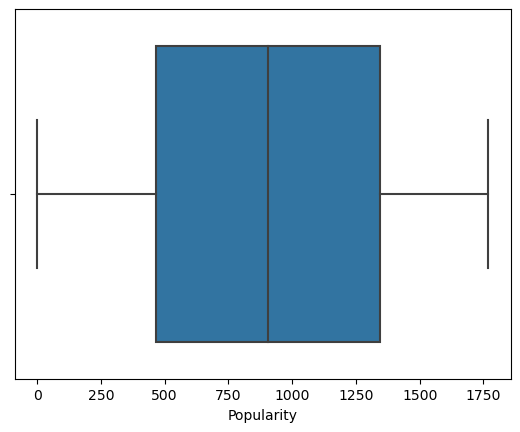

In [46]:
# Let's check the outliers

numerical_columns = ['Duration', 'Year', 'Rating', 'Metascore', 'Votes', 'Gross collection', 'Popularity']
for column in numerical_columns:
    sns.boxplot(x = dff[column])
    plt.show()

Here as we can see except 'Metascore', and 'Popularity' every other variable have outliers present.
Let's winsorize and clip the extreme values present.

In [47]:
from scipy.stats.mstats import winsorize

# Winsorize all numerical columns
num_cols = dff.select_dtypes(include = np.number).columns.tolist()
dff[num_cols] = dff[num_cols].apply(lambda x: winsorize(x, limits = [0.05, 0.05]), axis = 0)

# Clip extreme values now
clip_values = dff[num_cols].quantile([0.01, 0.99])
dff[num_cols] = dff[num_cols].clip(lower = clip_values.loc[0.01], upper = clip_values.loc[0.99], axis = 1)

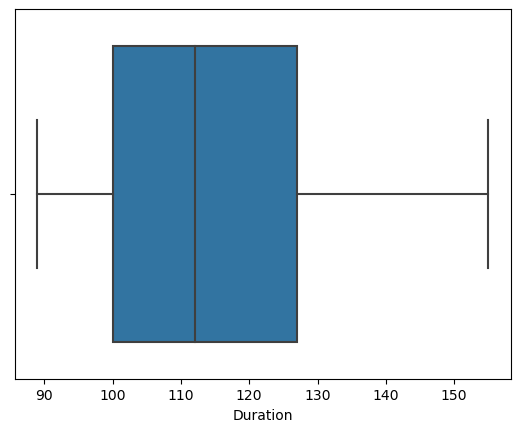

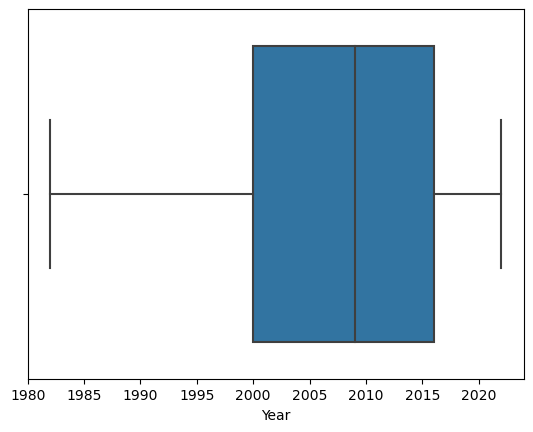

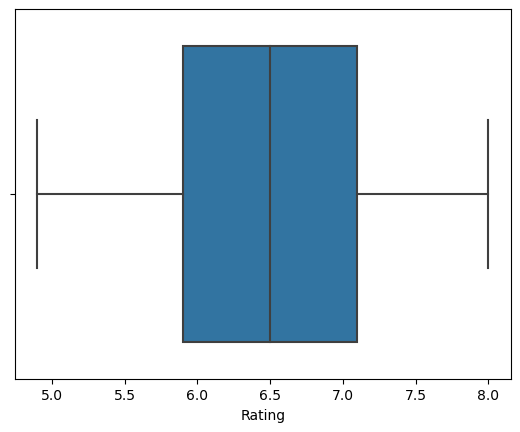

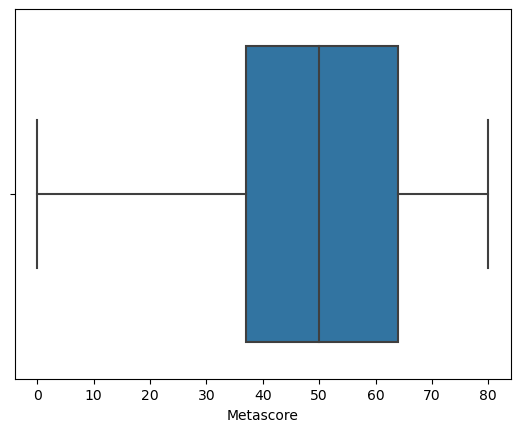

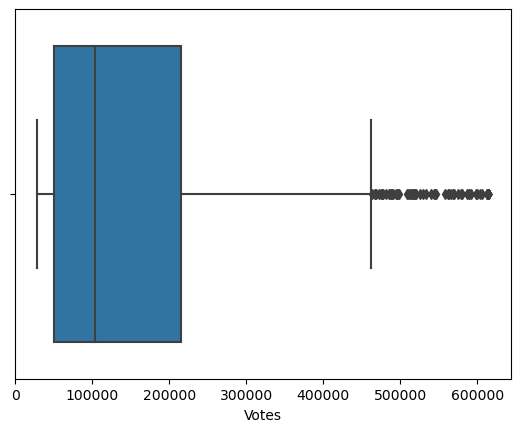

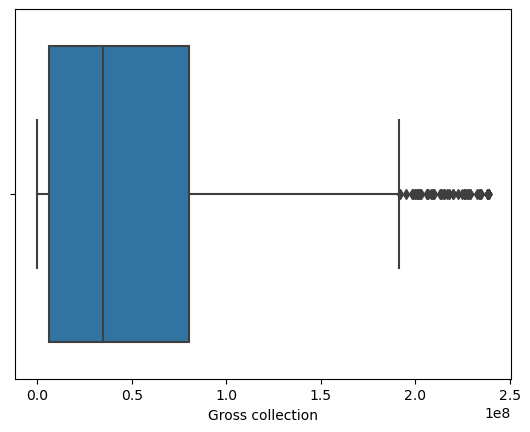

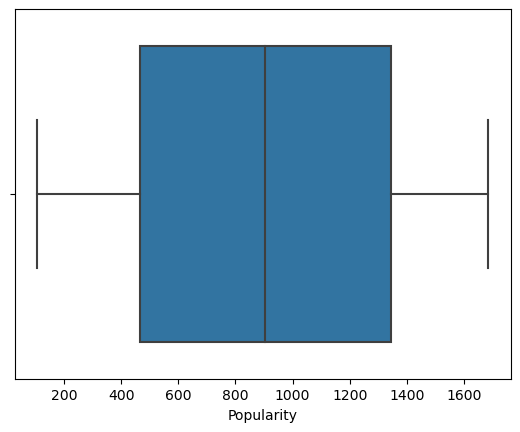

In [48]:
numerical_columns = ['Duration', 'Year', 'Rating', 'Metascore', 'Votes', 'Gross collection', 'Popularity']
for column in numerical_columns:
    sns.boxplot(x = dff[column])
    plt.show()

As we have winsorize the coloumns and clipped the extreme values, all columns are handled except 'Votes', and 'Gross collection.

In [49]:
from scipy import stats
from scipy.stats import zscore

z_threshold = 3

# Clculate z-score for numerical columns
columns= ['Votes', 'Gross collection']
z_scores= stats.zscore(dff[columns])

# Identify and remove the outliers
outlier_indices= (np.abs(z_scores)> z_threshold).any(axis=1)
dff= dff[~outlier_indices]

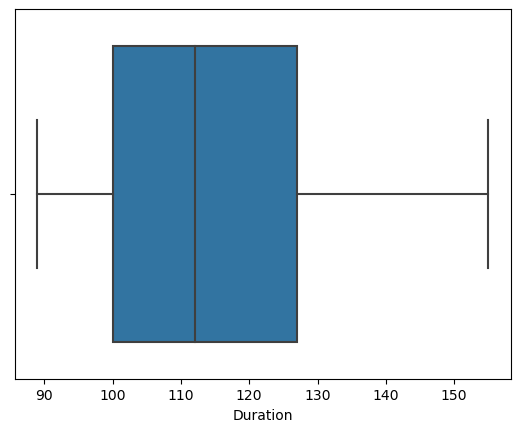

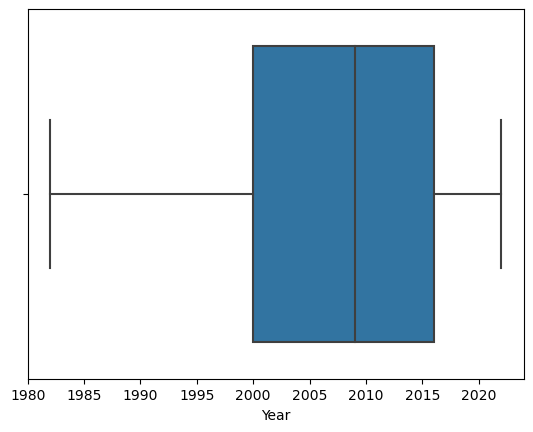

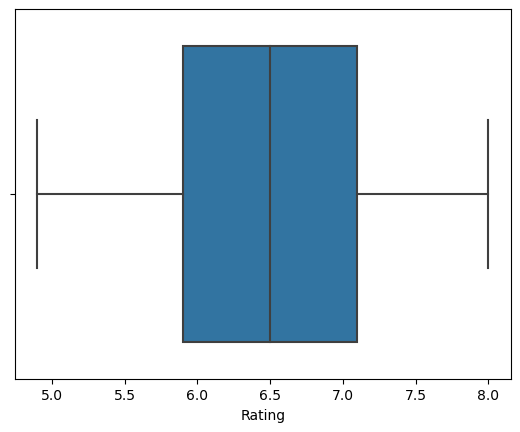

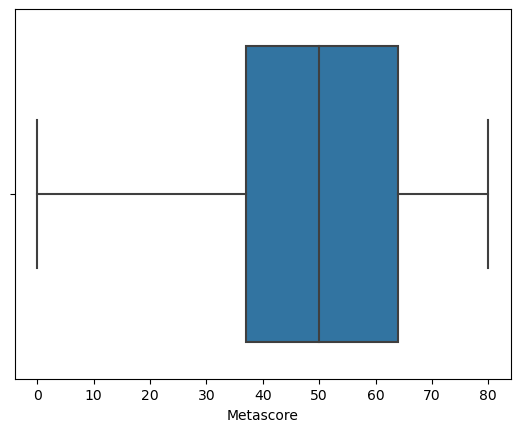

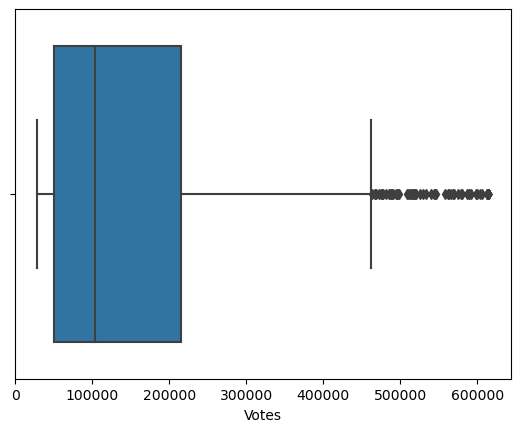

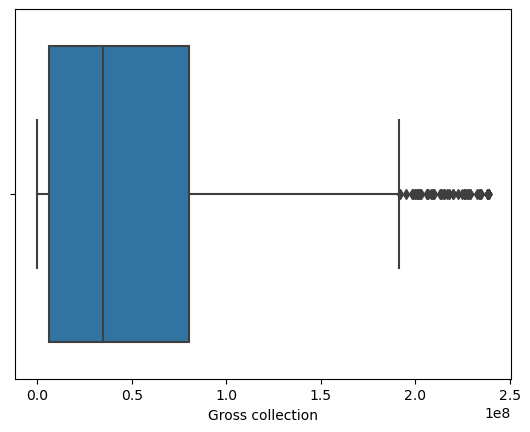

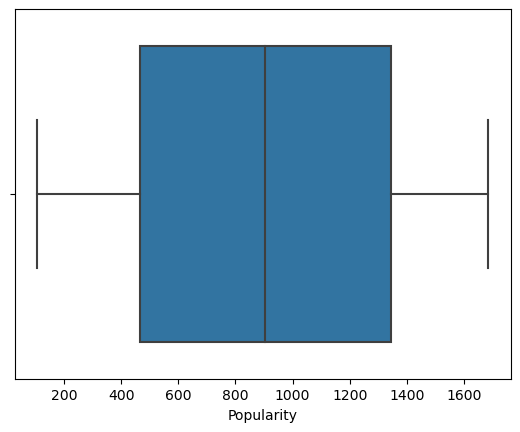

In [50]:
numerical_columns = ['Duration', 'Year', 'Rating', 'Metascore', 'Votes', 'Gross collection', 'Popularity']
for column in numerical_columns:
    sns.boxplot(x = dff[column])
    plt.show()

In [51]:
dff.shape

(1609, 17)

# Skewness

Here we will be checking for skewness and those values which are not in the range of -0.5 to +0.5, will be handling them.

We will be using box-cox transformation technique to handle the skewness in the column.

Boxcox transformation. It involves applying power transformation to the original data. It helps in improving the model's performance. Implementing the box-cox transformation in Python can be done using libraries such as SciPy.stats  using 'from scipy.stats import boxcox' .

In [52]:
dff.skew()

Duration            0.593886
Year               -0.683143
Rating             -0.032495
Metascore          -0.750606
Votes               1.534048
Gross collection    1.409201
Popularity         -0.010713
dtype: float64

In [53]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# List of columns to transform
columns = ['Duration', 'Votes', 'Gross collection']

# Apply boxcox transformation
for col in columns:
    data = dff[col]
    # transform the data using boxcox
    data_transformed, lambda_val = boxcox(data+1)
    dff[col] = data_transformed
    
dff.skew()    

Duration            0.052250
Year               -0.683143
Rating             -0.032495
Metascore          -0.750606
Votes               0.059257
Gross collection   -0.761932
Popularity         -0.010713
dtype: float64

In [54]:
dff

,Movie Name,Director1,Duration,Year,Rating,Metascore,Star1,Star2,Star3,Star4,Votes,Genre1,Genre2,Genre3,Gross collection,Popularity,Certification
0,The Dark Knight,Christopher Nolan,0.899752,2008,8.0,80.0,Christian Bale,\nHeath Ledger,\nAaron Eckhart,\nMichael Caine,5.139714,Action,Crime,Drama,294.605319,107,UA
1,The Lord of the Rings: The Return of the King,Peter Jackson,0.899825,2003,8.0,80.0,Elijah Wood,\nViggo Mortensen,\nIan McKellen,\nOrlando Bloom,5.139714,Action,Adventure,Drama,294.605319,107,U
2,Spider-Man: Across the Spider-Verse,s:\nJoaquim Dos Santos,0.899426,2022,8.0,80.0,Shameik Moore,\nHailee Steinfeld,\nBrian Tyree Henry,\nLuna Lauren Velez,5.018454,Animation,Action,Adventure,0.000000,107,U
3,Inception,Christopher Nolan,0.899650,2010,8.0,74.0,Leonardo DiCaprio,\nJoseph Gordon-Levitt,\nElliot Page,\nKen Watanabe,5.139714,Action,Adventure,Sci-Fi,294.605319,107,UA
4,The Lord of the Rings: The Fellowship of the Ring,Peter Jackson,0.899825,2001,8.0,80.0,Elijah Wood,\nIan McKellen,\nOrlando Bloom,\nSean Bean,5.139714,Action,Adventure,Drama,294.605319,107,U
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,Heropanti 2,Ahmed Khan,0.899569,2022,4.9,0.0,Tiger Shroff,\nNawazuddin Siddiqui,\nTara Sutaria,\nAmber Doig-Thorne,4.751808,Action,Comedy,Crime,0.000000,1685,UA
1605,Alone in the Dark,Uwe Boll,0.897682,2005,4.9,9.0,Christian Slater,\nTara Reid,\nStephen Dorff,\nFrank C. Turner,4.826475,Action,Horror,Sci-Fi,126.136824,1685,A
1606,House of the Dead,Uwe Boll,0.897075,2003,4.9,15.0,Jonathan Cherry,\nTyron Leitso,\nClint Howard,\nOna Grauer,4.795837,Action,Adventure,Horror,146.920660,1685,A
1607,Radhe,Prabhu Deva,0.898234,2021,4.9,0.0,Salman Khan,\nDisha Patani,\nRandeep Hooda,\nJackie Shroff,5.007706,Action,Crime,Thriller,0.000000,1685,UA


Skewness is handled possibly.

# Encoding Categorical Columns

Here we will be using Label encoder method to encode the categorical column into numerical column.

Label Encoder: Label encoding assigns numerical labels to each unique category in a categorical variable using integers starting from 0.The labels are assigned in an ordinal manner, which means that the labels are ordered based on the alphabetical or numerical order of the categories.

For this we will be importing library from 'sklearn.preprocessing import LabelEncoder'

Lets encode categorical columns.

In [55]:
dff.dtypes

Movie Name           object
Director1            object
Duration            float64
Year                  int64
Rating              float64
Metascore           float64
Star1                object
Star2                object
Star3                object
Star4                object
Votes               float64
Genre1               object
Genre2               object
Genre3               object
Gross collection    float64
Popularity            int64
Certification        object
dtype: object

In [56]:
from sklearn.preprocessing import LabelEncoder

# Get all categorical columns
cat_columns = dff.select_dtypes(include = ['object']).columns.tolist()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply encoder to each categorical column
for col in cat_columns:
    dff[col] = le.fit_transform(dff[col])
    
dff.dtypes    

Movie Name            int64
Director1             int64
Duration            float64
Year                  int64
Rating              float64
Metascore           float64
Star1                 int64
Star2                 int64
Star3                 int64
Star4                 int64
Votes               float64
Genre1                int64
Genre2                int64
Genre3                int64
Gross collection    float64
Popularity            int64
Certification         int64
dtype: object

In [57]:
dff

,Movie Name,Director1,Duration,Year,Rating,Metascore,Star1,Star2,Star3,Star4,Votes,Genre1,Genre2,Genre3,Gross collection,Popularity,Certification
0,1181,122,0.899752,2008,8.0,80.0,111,375,0,813,5.139714,0,4,4,294.605319,107,17
1,1279,553,0.899825,2003,8.0,80.0,173,991,418,916,5.139714,0,1,4,294.605319,107,14
2,1043,826,0.899426,2022,8.0,80.0,559,364,135,749,5.018454,1,0,0,0.000000,107,14
3,543,122,0.899650,2010,8.0,74.0,387,516,319,657,5.139714,0,1,13,294.605319,107,17
4,1278,553,0.899825,2001,8.0,80.0,173,393,851,1104,5.139714,0,1,4,294.605319,107,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,499,10,0.899569,2022,4.9,0.0,595,742,1076,36,4.751808,0,3,3,0.000000,1685,17
1605,65,757,0.897682,2005,4.9,9.0,112,947,1056,360,4.826475,0,8,13,126.136824,1685,8
1606,519,757,0.897075,2003,4.9,15.0,316,981,209,914,4.795837,0,1,8,146.920660,1685,8
1607,884,569,0.898234,2021,4.9,0.0,534,255,913,466,5.007706,0,4,15,0.000000,1685,17


In [58]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1609 entries, 0 to 1608
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Movie Name        1609 non-null   int64  
 1   Director1         1609 non-null   int64  
 2   Duration          1609 non-null   float64
 3   Year              1609 non-null   int64  
 4   Rating            1609 non-null   float64
 5   Metascore         1609 non-null   float64
 6   Star1             1609 non-null   int64  
 7   Star2             1609 non-null   int64  
 8   Star3             1609 non-null   int64  
 9   Star4             1609 non-null   int64  
 10  Votes             1609 non-null   float64
 11  Genre1            1609 non-null   int64  
 12  Genre2            1609 non-null   int64  
 13  Genre3            1609 non-null   int64  
 14  Gross collection  1609 non-null   float64
 15  Popularity        1609 non-null   int64  
 16  Certification     1609 non-null   int64  


# Correlation Between Target And Independent Variables

Now here, we will be checking the correlation matrix which shows the relation between target and independent variable. We will get it by using df.corr() function. We will be finding the correlation to know which feature is more positive or negatively correlated to the target vaiable, which will be helping us for the feature selction to avoid overfitting. We will also be visualizing this correlation with using heatmap. And will be using seaborn library for heatmap.

In [59]:
# Check the Correlation

dff.corr()

,Movie Name,Director1,Duration,Year,Rating,Metascore,Star1,Star2,Star3,Star4,Votes,Genre1,Genre2,Genre3,Gross collection,Popularity,Certification
Movie Name,1.000000,-0.018062,0.000671,-0.037302,0.018024,0.042883,-0.018731,0.002635,0.015848,0.030527,0.028393,-0.026880,-0.030756,0.073103,0.040182,-0.013694,-0.007708
Director1,-0.018062,1.000000,-0.027240,-0.062610,0.010526,-0.040737,-0.043093,0.030509,0.002815,0.039545,-0.033731,0.124862,-0.051702,-0.010785,-0.049249,-0.007247,-0.024879
Duration,0.000671,-0.027240,1.000000,0.146726,0.361920,0.053209,0.026630,0.028357,0.014296,0.045013,0.271916,-0.181005,-0.072518,0.089771,0.076619,-0.359521,0.172469
Year,-0.037302,-0.062610,0.146726,1.000000,-0.098740,-0.128012,-0.031154,0.010541,-0.018773,0.006590,0.080001,0.048777,-0.011560,-0.110028,-0.212533,0.067664,0.002369
Rating,0.018024,0.010526,0.361920,-0.098740,1.000000,0.458494,0.028970,-0.015534,-0.011016,0.036226,0.394738,0.155716,-0.034731,-0.007631,0.060717,-0.949296,0.011737
Metascore,0.042883,-0.040737,0.053209,-0.128012,0.458494,1.000000,-0.038962,-0.041022,-0.063659,-0.013292,0.430405,0.102570,-0.110538,0.000181,0.341506,-0.447956,-0.019729
Star1,-0.018731,-0.043093,0.026630,-0.031154,0.028970,-0.038962,1.000000,-0.018597,0.032561,0.010317,-0.011140,0.002688,0.030908,0.038859,-0.014719,-0.024261,-0.028307
Star2,0.002635,0.030509,0.028357,0.010541,-0.015534,-0.041022,-0.018597,1.000000,0.031244,0.045491,-0.030101,-0.052364,-0.008233,-0.038685,-0.015782,0.030198,0.017499
Star3,0.015848,0.002815,0.014296,-0.018773,-0.011016,-0.063659,0.032561,0.031244,1.000000,0.037826,-0.046571,-0.002921,0.046448,0.018134,-0.043860,0.010534,0.013619
Star4,0.030527,0.039545,0.045013,0.006590,0.036226,-0.013292,0.010317,0.045491,0.037826,1.000000,-0.023760,0.035125,-0.025504,0.018823,-0.046686,-0.032199,0.049776


In [60]:
correlation_matrix = dff.corr()
Votes_correlation = correlation_matrix['Votes']
print(Votes_correlation)

correlation_matrix = dff.corr()
Gross_collection_correlation = correlation_matrix['Gross collection']
print(Gross_collection_correlation)

Movie Name          0.028393
Director1          -0.033731
Duration            0.271916
Year                0.080001
Rating              0.394738
Metascore           0.430405
Star1              -0.011140
Star2              -0.030101
Star3              -0.046571
Star4              -0.023760
Votes               1.000000
Genre1             -0.040026
Genre2             -0.118867
Genre3              0.150830
Gross collection    0.627057
Popularity         -0.418687
Certification       0.065404
Name: Votes, dtype: float64
Movie Name          0.040182
Director1          -0.049249
Duration            0.076619
Year               -0.212533
Rating              0.060717
Metascore           0.341506
Star1              -0.014719
Star2              -0.015782
Star3              -0.043860
Star4              -0.046686
Votes               0.627057
Genre1              0.014858
Genre2             -0.146987
Genre3              0.070973
Gross collection    1.000000
Popularity         -0.073231
Certification  

# Visualization of Correlation Matrix

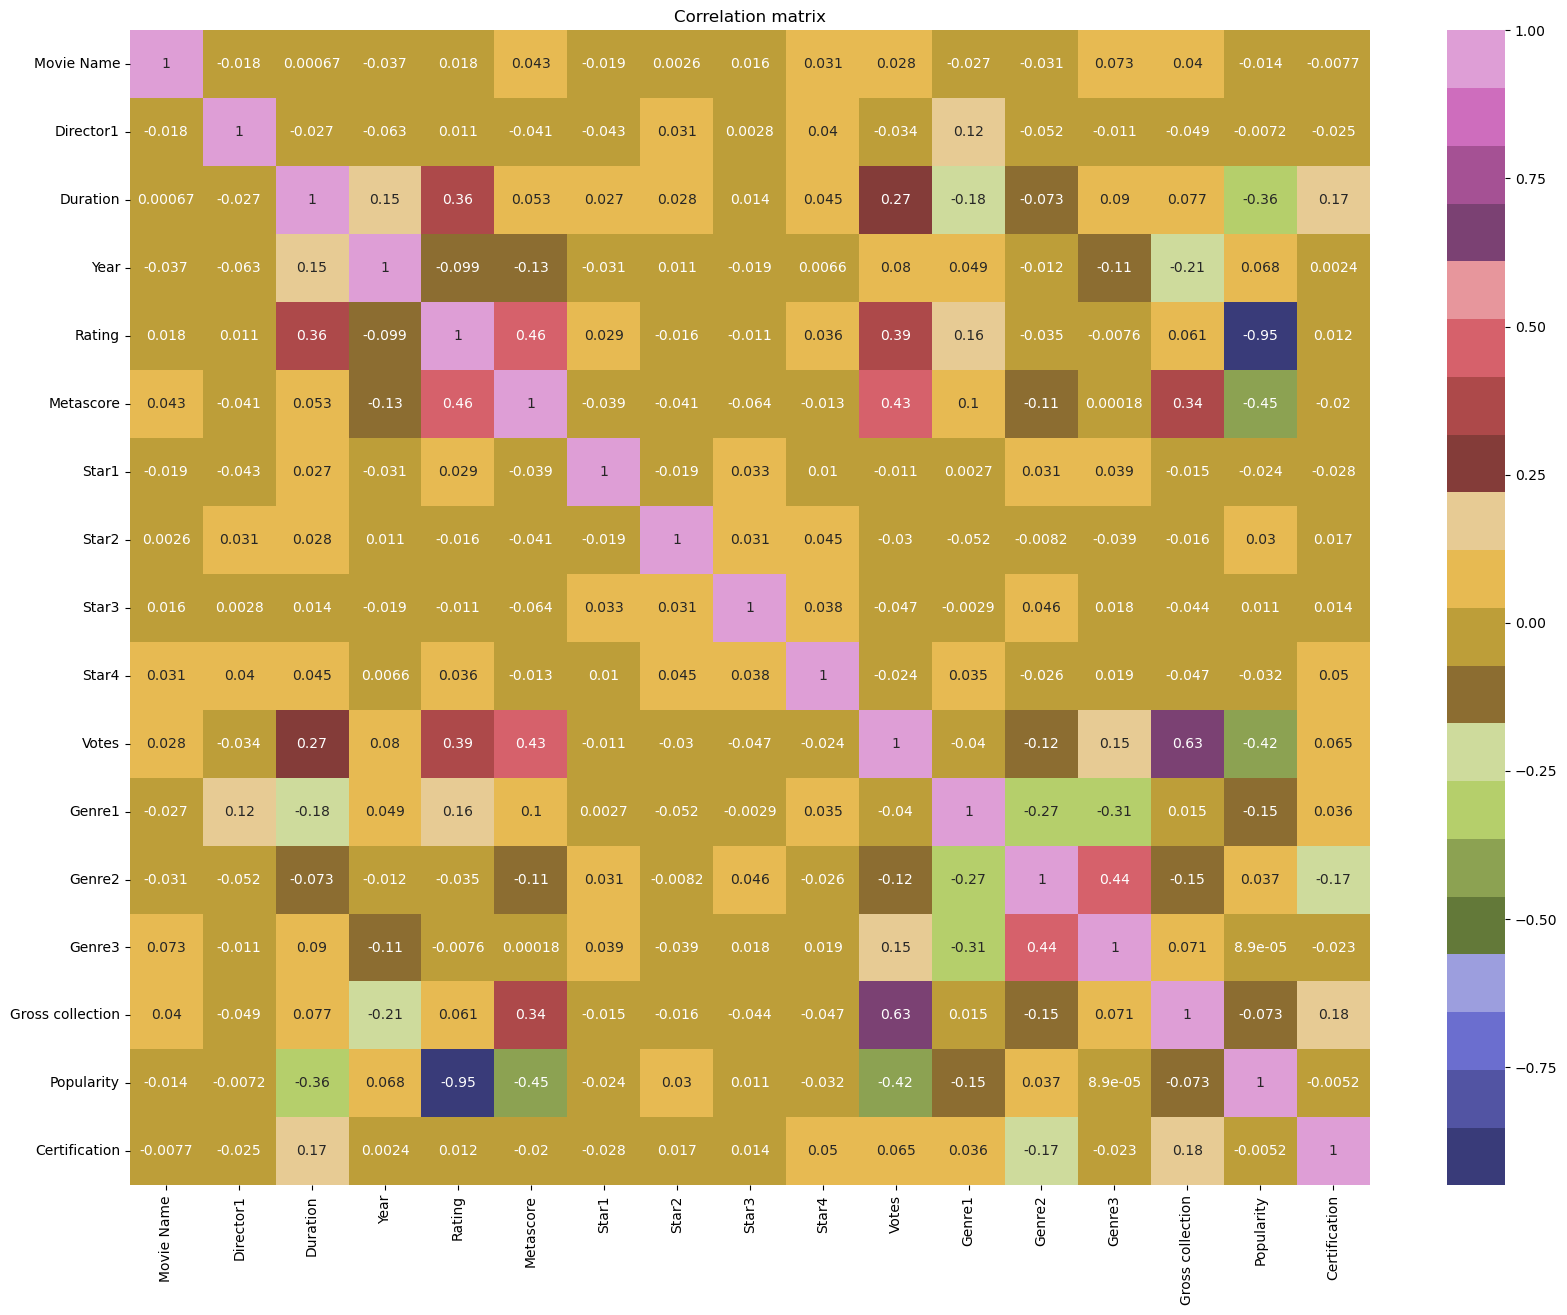

In [61]:
# Lets Visualize matrix by using heatmap

correlation_matrix = dff.corr()
plt.figure(figsize = (20,15))
sns.heatmap(correlation_matrix, annot = True, cmap = 'tab20b')
plt.title('Correlation matrix')
plt.show()

# Feature Engeneering

Now we will be defining the target and independent variable, so that it will be clear what to predict on what basis. Fearure selection will be done by using logistic regression. Then we will proceed with the feature scaling process using MinMaxScaler from sklearn.preprocessing.

Feature Scaling: It is performed to bring all the features to a similar scale or value range. It basically helps in improving the performance, convergence, and interpretability of ML algorithm. It ensures that all features should be treated equally during the modeling.

MinMaxScaler: This technique used to transform features by scaling them to a specified range which should be between 0-1. It ensures that all features are scaled proportionally. This technique is useful to preserve the shape of the original distribution while bringing all features to a common scale.

After this we will proceed with checking out for multicollinearity by finding the vif(variation inflation factor) values. For this we will be importing statsmodels.api and then from statsmodels.stats.outliers_inflation importing variance_inflation_factor to find out the vif values for the features.

A vif value 1 indicates no multicollinearity, while values greater than 1 suggest increasing multicollinearity. Generally , vif value above 5 or 10 is considered very high, so in that case we need to handle the multicollinearity.

If we will find any value above range we will be handling that by dropping one or two column with high multicollinearity, an will also be adding constant term for calculating vif. A constant term will allow and help us for a more accurate assessment of multicollinearity and its impact on predictor variable.

After handling multicollinearity issue, we will proceed with finding the Best Random State, which will ensure that further operations should be reproducible. Here we will be using logistic regression algorithm for classification tasks to generate the best random state. The genrated best random score by this alogorithm should be used in all further runs for results reproducibility.

We will have to balance the target variable if there is any imbalance(in case of classification problem), and in that case we will be using RandomOverSampler technique. But it is a regression problem so no balancing is required.

Now we will be spliting the data into train and test so that we can train models on train data and can check its performance on test data. As We have a limited observation so, we will be taking "test size- 0.2", rest will be used as train data to train the model.

# A. Target and Independent Variables for 'Votes'

In [62]:
# Define Target and Independent Variable

X = dff.drop('Votes', axis = 1)
y = dff['Votes']

print("\nFeatures variables names: ", list(X.columns))
print("Features variables dimensions: ", X.shape)

print("Target variable name: ", y.name)
print("Target variable dimensions: ", y.shape)


Features variables names:  ['Movie Name', 'Director1', 'Duration', 'Year', 'Rating', 'Metascore', 'Star1', 'Star2', 'Star3', 'Star4', 'Genre1', 'Genre2', 'Genre3', 'Gross collection', 'Popularity', 'Certification']
Features variables dimensions:  (1609, 16)
Target variable name:  Votes
Target variable dimensions:  (1609,)


# Feature selection(Votes)

In [63]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

X = dff.drop('Votes', axis = 1)
y = dff['Votes']

# Initialize the model
model = LinearRegression()

# Initialize the RFE selector with model
rfe = RFE(model, n_features_to_select = 5)
rfe.fit(X,y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the features
print(selected_features)

fit_score = rfe.ranking_
print("Fit Score:")
print(fit_score)

# Get the column names of all features
all_columns = X.columns
feature_rankings = pd.DataFrame({'Feature': all_columns, 'Ranking': fit_score})

# Sort the featires based on their rankings (lower rank indicated higher importance)
feature_rankings = feature_rankings.sort_values('Ranking')

print("Feature Rankings:")
print(feature_rankings)

Index(['Duration', 'Rating', 'Genre1', 'Genre2', 'Genre3'], dtype='object')
Fit Score:
[ 9  7  1  2  1  5 11  8 12 10  1  1  1  4  6  3]
Feature Rankings:
             Feature  Ranking
2           Duration        1
4             Rating        1
10            Genre1        1
11            Genre2        1
12            Genre3        1
3               Year        2
15     Certification        3
13  Gross collection        4
5          Metascore        5
14        Popularity        6
1          Director1        7
7              Star2        8
0         Movie Name        9
9              Star4       10
6              Star1       11
8              Star3       12


In [64]:
X = X.drop(['Star3', 'Star1', 'Star4'], axis = 1)

# Feature Scaling

In [65]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler and apply to all columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create a new dataframe with the scaled features
X_scaled_dff = pd.DataFrame(X_scaled, columns = X.columns)
print(X_scaled_dff)

      Movie Name  Director1  Duration   Year  Rating  Metascore     Star2  \
0       0.775443   0.141367  0.974085  0.650     1.0     1.0000  0.357824   
1       0.839790   0.640788  1.000000  0.525     1.0     1.0000  0.945611   
2       0.684833   0.957126  0.858768  1.000     1.0     1.0000  0.347328   
3       0.356533   0.141367  0.937819  0.700     1.0     0.9250  0.492366   
4       0.839133   0.640788  1.000000  0.475     1.0     1.0000  0.375000   
...          ...        ...       ...    ...     ...        ...       ...   
1604    0.327643   0.011587  0.909244  1.000     0.0     0.0000  0.708015   
1605    0.042679   0.877173  0.241405  0.575     0.0     0.1125  0.903626   
1606    0.340775   0.877173  0.026660  0.525     0.0     0.1875  0.936069   
1607    0.580433   0.659328  0.436802  0.975     0.0     0.0000  0.243321   
1608    0.579120   0.680185  1.000000  0.900     0.0     0.0000  0.835878   

      Genre1    Genre2    Genre3  Gross collection  Popularity  Certificati

# Variance Inflation Factor(VIF)

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Add constant column to features
X_scaled_dff = sm.add_constant(X_scaled_dff)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["X"] = X_scaled_dff.columns
vif["VIF"] = [variance_inflation_factor(X_scaled_dff.values, i) for i in range (X_scaled_dff.shape[1])]
print(vif)

                   X         VIF
0              const  168.609585
1         Movie Name    1.013755
2          Director1    1.033346
3           Duration    1.427961
4               Year    1.153254
5             Rating   10.739444
6          Metascore    1.516084
7              Star2    1.011771
8             Genre1    1.291966
9             Genre2    1.396281
10            Genre3    1.370030
11  Gross collection    1.289262
12        Popularity   10.312054
13     Certification    1.100307


In [67]:
X_scaled = X_scaled_dff.drop(['Popularity'], axis = 1)

In [68]:
X_scaled['const'] = 1

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["X"] = X_scaled.columns
vif["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range (X_scaled.shape[1])]
print(vif)

                   X        VIF
0              const  43.609149
1         Movie Name   1.013568
2          Director1   1.033346
3           Duration   1.425419
4               Year   1.144608
5             Rating   1.654724
6          Metascore   1.514393
7              Star2   1.009546
8             Genre1   1.291666
9             Genre2   1.396025
10            Genre3   1.368800
11  Gross collection   1.286160
12     Certification   1.098811


 Here all vif are handled

# Value count for Target Variable

In [69]:
y.value_counts()

4.751808    82
5.139714    81
5.062069     2
4.826114     2
4.785578     2
            ..
4.909382     1
4.759130     1
5.053265     1
5.071093     1
4.830763     1
Name: Votes, Length: 1385, dtype: int64

# Best Random State

Lets find Best Random State

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Split the data into training and testing sets using different random states
best_random_state = None
best_r2_score = -1
for random_state in range(100):
    X_train, X_test, y_train, y_test = train_test_split(dff.drop('Votes', axis = 1), dff['Votes'], test_size = 0.2, random_state = random_state)
    
    # Fit the model
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Check if this random state gives a better r2 score
    if r2 > best_r2_score:
        best_r2_score = r2
        best_random_state = random_state
        
print("Best random state:", best_random_state)
print("Best R^2 score:", best_r2_score)

Best random state: 57
Best R^2 score: 0.7492256489171811


Here, we find the Best R^2 score is 0.7450119332970784 at best random state 57.

# Split the Data

In [71]:
# Let's split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 57)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1287, 13)
(322, 13)
(1287,)
(322,)


# Modelling(Regression Algorithm)

Now we will be start modelling process which involve the train the model on training dataset and make it ready for testing or prediction phase. For modelling we will be using regression algorithm as this is the regression problem, where we have to predict the votes.

We will be using different algorithms to check which one is performing best on both testing and test data depends on this specific dataset and make it ready for making prediction on unseen data. Algorithms will be used in this problems are: Linear Regression, Ridge, and ElasticNet will be importing from sklearn.linear_model, RandomForest Regression, and GradientBoost Regression will be importing from sklearn.ensemble. We will be train our model on each algorithms and will be evaluating the R2 score for test data and train data, Mean absolute error(MAE), Mean square error(MSE), and Root mean square error(RMSE) to check the accuracy and performance. On this basis we will first find out which one will be performing well, then further for more accuracy we will be finding out cross validation score and will find out the difference between the R2 score and mean cv score, lesser the difference accurate the performance, and finally we will be using hyperparameter tuning to hypertune the best three performing model base on lesser difference to check their performance. At last we will be saving that model for future prediction on unseen data.

We will be importing cross_val_score from sklearn.models_selection

# Linear Regression

In [72]:
# Initialize the linear regression model and fit the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate the evaluation metrics
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, lr.predict(X_train))
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Root squared on test data:", np.sqrt(r2_test))
print("MAE:", mae)
print("MSE:", mse)
print("Root mean square error:", rmse)
print("Root squared on training data:", np.sqrt(r2_train))

Root squared on test data: 0.8188536018193491
MAE: 0.05378365193358136
MSE: 0.0045109140264933435
Root mean square error: 0.06716333841087221
Root squared on training data: 0.7851733240858969


# Ridge (L2)Regression

In [73]:
# Initialize the Ridge Regression model and fit the training data 
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Calculate Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("Root squared on training data:", r2_train)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)

Root squared on test data: 0.6705548433068427
Root squared on training data: 0.6164960417829528
MAE on test data: 0.05378739386587472
MSE on test data: 0.004510453704352314
RMSE on test data: 0.06715991143794275


# ElasticNet Regression

In [74]:
# Initialize the model and fit the training data
elastic_net = ElasticNet(alpha = 0.01, l1_ratio = 0.5)
elastic_net.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = elastic_net.predict(X_train)
y_test_pred = elastic_net.predict(X_test)

# Calculate Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("Root squared on training data:", r2_train)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)

Root squared on test data: 0.5278679164841305
Root squared on training data: 0.4729437387995009
MAE on test data: 0.06770249294381277
MSE on test data: 0.006463989109486765
RMSE on test data: 0.08039893724102803


# Random Forest Regression

In [75]:
# Initialize the Random Forest Regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=57)
rf.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("Root squared on training data:", r2_train)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)

Root squared on test data: 0.7386600447693159
Root squared on training data: 0.9564137295962644
MAE on test data: 0.046002045246483964
MSE on test data: 0.0035780212433458125
RMSE on test data: 0.05981656328598135


# Gradient Boosting Regression

In [76]:
# Initialize the Random Forest Regression model and fit the training data
gbr = GradientBoostingRegressor(n_estimators=100, max_depth =3, random_state=57)
gbr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Calculate Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("Root squared on training data:", r2_train)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)

Root squared on test data: 0.7736977130870045
Root squared on training data: 0.8341202122604943
MAE on test data: 0.04359432013787108
MSE on test data: 0.0030983183925232713
RMSE on test data: 0.0556625402988695


# KNeighbors Regression

In [77]:
# Initialize the Random Forest Regression model and fit the training data
knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = knr.predict(X_train)
y_test_pred = knr.predict(X_test)

# Calculate Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("Root squared on training data:", r2_train)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)

Root squared on test data: 0.6226911817460947
Root squared on training data: 0.712072035657813
MAE on test data: 0.055844535750514734
MSE on test data: 0.0051657580098019035
RMSE on test data: 0.07187320787193169


# Support Vector Regression

In [78]:
# Initialize the Random Forest Regression model and fit the training data
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("Root squared on training data:", r2_train)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)

Root squared on test data: 0.6606374595018816
Root squared on training data: 0.6033774030790107
MAE on test data: 0.055656743945502865
MSE on test data: 0.004646233210020487
RMSE on test data: 0.06816328344512526


# XGBoost Regression

In [79]:
# Initialize the Random Forest Regression model and fit the training data
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("Root squared on training data:", r2_train)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)

Root squared on test data: 0.7256794050425709
Root squared on training data: 0.806732868374027
MAE on test data: 0.04993309881575913
MSE on test data: 0.0037557399723993756
RMSE on test data: 0.06128409232744967


We can see here in above modelling processes, Linear regression model performed good on both training and test data, Ridge, Elastic net, and Support vector regression model performed average on both test and training data, rest other models are overfitted.
Till here Linear Regression is the best fitted model, but as we have seen overfitted mode, so, we will check CV Score for more accuracy.

Let's check the CV score

# Cross Validation Score (CV Score)

# Linear Regression CV Score

In [80]:
# Initialize the linear regression model and fit the training data
lr = LinearRegression()

# Perform cross-validation on the model
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ",(diff))

Cross-Validation Scores:  [0.57573747 0.58714805 0.55230162 0.46282033 0.37072775]
Mean of CV Scores:  0.5097470445208903
Difference between R2 score and mean CV score:  0.16077417669163085


# Ridge(L2) Regression CV Score

In [81]:
# Initialize the Ridge regression model and fit the training data
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.57820061 0.59351722 0.55205216 0.46273434 0.38000566]
Mean of CV Scores:  0.5133020002527129
Difference between R2 score and mean CV score:  0.15722270991678577


# ElasticNet CV Score

In [82]:
# Initialize the model and fit the training data
elastic_net = ElasticNet(alpha = 0.01, l1_ratio = 0.5)
elastic_net.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(elastic_net, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = elastic_net.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.56474613 0.58360311 0.53484304 0.43185103 0.41206355]
Mean of CV Scores:  0.5054213711534227
Difference between R2 score and mean CV score:  0.02244654533070778


# RandomForestRegression CV Score

In [83]:
# Initialize the random forest regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=57)
rf.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.51949703 0.62659534 0.62127837 0.56121183 0.49211234]
Mean of CV Scores:  0.5641389815629619
Difference between R2 score and mean CV score:  0.17452106320635397


# GradientBoostingRegression CV Score

In [84]:
# Initialize the Gradient Boosting Regression model with default parameters
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(gbr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.61765578 0.65421801 0.6437498  0.58669236 0.51086086]
Mean of CV Scores:  0.6026353615677225
Difference between R2 score and mean CV score:  0.1713984832975749


# KNeighborsRegression CV Score

In [85]:
# Initialize a KNeighbors Regressor model
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(knr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = knr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.13800124 0.13263007 0.11794895 0.0690937  0.05356609]
Mean of CV Scores:  0.1022480106361791
Difference between R2 score and mean CV score:  0.5204431711099157


# SupportVectorRegression CV Score

In [86]:
# Initializes the Support Vector Regressor model
svr= SVR()
svr.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = svr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.38082393 0.49041309 0.41332099 0.2905864  0.35760428]
Mean of CV Scores:  0.3865497393059506
Difference between R2 score and mean CV score:  0.2770291801054269


# XGB CV Score

In [87]:
import xgboost as xgb

# Initialize the XGBoost Regressor model
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(xgb, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.35516518 0.47143894 0.61892437 0.5705609  0.5117793 ]
Mean of CV Scores:  0.5055737367667487
Difference between R2 score and mean CV score:  0.22010566827582223


Based on the difference between R2 score and mean CV score , we can see that the ElasticNetRegression is the best performing model in this case although it is performing good on train data then test data but, smaller the difference, the better the model's generalization performance.

ElasticNetRegression is the best fitted and performing model with least difference.

Now we will perform hyperparametertuning for more accuracy to the few best model according to their difference to check their performance more accurately.

# Hyperparameter Tuning

Here in this step we will be using the RandomizedSearchCV technique for performing hyperparameter tuning.

Hyperparameters are those parameters which are not learned from the data but predefined when the learning process begins. They basically controls the behaviour of the learning algorithm and shows the significant impact on the performance of the model.

RandomizedSearch CV: It automates the process of hyperparameter tuning by randomly sampling a defined number of hyperparameter combinations from a given parameter distribution. It evaluates the model's performance for each sampled combination and identifies the best set of hyperparameters that optimize a specified evaluation metric, such as accuracy or mean squared error.

Advantages of RandomizedSearchCV: Avoidance of Overfitting, Efficient Search Space Exploration, Time-saving, and Flexibility.

RandomizedSearchCV is a powerful technique for hyperparameter tuning that balances exploration of the search space with computational efficiency, helping you find a good set of hyperparameters for your model.

# Randomized SearchCV

# ElasticNetRegression

In [88]:
from scipy.stats import uniform

param_dist = {'alpha': [0.01, 0.1, 1],
                 'max_iter': [20, 100, 500, 1000],
                  'l1_ratio': [0.25, 0.5, 0.75],
                 'fit_intercept': [True, False],
                 'selection': ['cyclic', 'random']}

elastic_net = ElasticNet()

# Create the randomized search CV object
elastic_net_random = RandomizedSearchCV(elastic_net, param_distributions=param_dist, cv=5, n_iter=100, random_state=57)

# Fit the randomized search CV object on the data
elastic_net_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", elastic_net_random.best_params_)
print("Best score:", elastic_net_random.best_score_)

Best parameters: {'selection': 'random', 'max_iter': 100, 'l1_ratio': 0.25, 'fit_intercept': True, 'alpha': 0.01}
Best score: 0.5441618176913712


# Ridge(L2)Regression

In [89]:
param_dist = {'alpha': [0.01, 0.1, 1],
                 'max_iter': [20, 100, 500, 1000],
                 'fit_intercept': [True, False],
                 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridge = Ridge()

# Create the randomized search CV object
ridge_random = RandomizedSearchCV(ridge, param_distributions=param_dist, cv=5, n_iter=100, random_state=57)

# Fit the randomized search CV object on the data
ridge_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", ridge_random.best_params_)
print("Best score:", ridge_random.best_score_)

Best parameters: {'solver': 'sag', 'max_iter': 20, 'fit_intercept': False, 'alpha': 0.01}
Best score: 0.6060444901538811


# Linear Regression

In [90]:
param_dist = {'n_jobs': [-1, 1, 2],
             'fit_intercept': [True, False]}


# Create the randomized search CV object
lr_random = RandomizedSearchCV(lr, param_distributions=param_dist, cv=5, n_iter=100, random_state=57)

# Fit the randomized search CV object on the data
lr_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", lr_random.best_params_)
print("Best score:", lr_random.best_score_)

Best parameters: {'n_jobs': -1, 'fit_intercept': True}
Best score: 0.6056538584631577


After performing hyperparameter tuning on the few best models according to least CV Score, It is concluded that ElasticNetRegression shows improvement and perfom well on test data, as earlier it was 52.7%, now its increases to 54.4%.

So, ElasticNetRegression is the best suited and performing model.

Save the model for Future prediction.

# Save the Model

In [91]:
# Saving model for the prediction of unseen data

import joblib

# Save the model using joblib
joblib.dump(elastic_net, 'IMDB_votes_model.joblib')

['IMDB_votes_model.joblib']

# B .Target and Independent Variables for 'Gross collection'

In [92]:
# Define Target and Independent Variable

X = dff.drop('Gross collection', axis = 1)
y = dff['Gross collection']

print("\nFeatures variables names: ", list(X.columns))
print("Features variables dimensions: ", X.shape)

print("Target variable name: ", y.name)
print("Target variable dimensions: ", y.shape)


Features variables names:  ['Movie Name', 'Director1', 'Duration', 'Year', 'Rating', 'Metascore', 'Star1', 'Star2', 'Star3', 'Star4', 'Votes', 'Genre1', 'Genre2', 'Genre3', 'Popularity', 'Certification']
Features variables dimensions:  (1609, 16)
Target variable name:  Gross collection
Target variable dimensions:  (1609,)


# Feature Selection(Gross collection)

In [93]:
X = dff.drop('Gross collection', axis = 1)
y = dff['Gross collection']

# Initialize the model
model = LinearRegression()

# Initialize the RFE selector with model
rfe = RFE(model, n_features_to_select = 5)
rfe.fit(X,y)

# Get the selected features
selected_features = X.columns[rfe.support_]

# Print the features
print(selected_features)

fit_score = rfe.ranking_
print("Fit Score:")
print(fit_score)

# Get the column names of all features
all_columns = X.columns
feature_rankings = pd.DataFrame({'Feature': all_columns, 'Ranking': fit_score})

# Sort the featires based on their rankings (lower rank indicated higher importance)
feature_rankings = feature_rankings.sort_values('Ranking')

print("Feature Rankings:")
print(feature_rankings)

Index(['Duration', 'Rating', 'Votes', 'Genre1', 'Certification'], dtype='object')
Fit Score:
[ 9  7  1  2  1  4 12 11 10  8  1  1  5  3  6  1]
Feature Rankings:
          Feature  Ranking
2        Duration        1
4          Rating        1
10          Votes        1
11         Genre1        1
15  Certification        1
3            Year        2
13         Genre3        3
5       Metascore        4
12         Genre2        5
14     Popularity        6
1       Director1        7
9           Star4        8
0      Movie Name        9
8           Star3       10
7           Star2       11
6           Star1       12


In [94]:
X = X.drop(['Star1', 'Star2', 'Star3', 'Movie Name'], axis = 1)

# Feature Selection

In [95]:
# Initialize the scaler and apply to all columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Create a new dataframe with the scaled features
X_scaled_dff = pd.DataFrame(X_scaled, columns = X.columns)
print(X_scaled_dff)

      Director1  Duration   Year  Rating  Metascore     Star4     Votes  \
0      0.141367  0.974085  0.650     1.0     1.0000  0.626348  1.000000   
1      0.640788  1.000000  0.525     1.0     1.0000  0.705701  1.000000   
2      0.957126  0.858768  1.000     1.0     1.0000  0.577042  0.687398   
3      0.141367  0.937819  0.700     1.0     0.9250  0.506163  1.000000   
4      0.640788  1.000000  0.475     1.0     1.0000  0.850539  1.000000   
...         ...       ...    ...     ...        ...       ...       ...   
1604   0.011587  0.909244  1.000     0.0     0.0000  0.027735  0.000000   
1605   0.877173  0.241405  0.575     0.0     0.1125  0.277350  0.192488   
1606   0.877173  0.026660  0.525     0.0     0.1875  0.704160  0.113504   
1607   0.659328  0.436802  0.975     0.0     0.0000  0.359014  0.659691   
1608   0.680185  1.000000  0.900     0.0     0.0000  0.360555  0.203541   

      Genre1    Genre2    Genre3  Popularity  Certification  
0        0.0  0.333333  0.235294     

# Variance Inflation Factor(VIF)

In [96]:
# Add constant column to features
X_scaled_dff = sm.add_constant(X_scaled_dff)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["X"] = X_scaled_dff.columns
vif["VIF"] = [variance_inflation_factor(X_scaled_dff.values, i) for i in range (X_scaled_dff.shape[1])]
print(vif)

                X         VIF
0           const  163.608214
1       Director1    1.029936
2        Duration    1.424607
3            Year    1.136273
4          Rating   10.601916
5       Metascore    1.488319
6           Star4    1.011681
7           Votes    1.520884
8          Genre1    1.297586
9          Genre2    1.419561
10         Genre3    1.412236
11     Popularity   10.429227
12  Certification    1.073724


In [97]:
X_scaled = X_scaled_dff.drop(['Popularity'], axis = 1)
X_scaled['const'] = 1

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["X"] = X_scaled.columns
vif["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range (X_scaled.shape[1])]
print(vif)

                X        VIF
0           const  37.326070
1       Director1   1.029931
2        Duration   1.422870
3            Year   1.132845
4          Rating   1.695811
5       Metascore   1.488154
6           Star4   1.011677
7           Votes   1.496713
8          Genre1   1.296292
9          Genre2   1.419527
10         Genre3   1.412147
11  Certification   1.072459


All vif are handled.

# Value Counts For Target Variable

In [98]:
y.value_counts()

0.000000      224
294.605319     81
29.244347       7
38.321598       6
41.076759       5
             ... 
196.671204      1
193.111989      1
229.851192      1
291.154161      1
98.020771       1
Name: Gross collection, Length: 1162, dtype: int64

# Best Random State

Lets find best random state for 'Gross collection'

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Split the data into training and testing sets using different random states
best_random_state = None
best_r2_score = -1
for random_state in range(100):
    X_train, X_test, y_train, y_test = train_test_split(dff.drop('Gross collection', axis = 1), dff['Gross collection'], test_size = 0.2, random_state = random_state)
    
    # Fit the model
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Check if this random state gives a better r2 score
    if r2 > best_r2_score:
        best_r2_score = r2
        best_random_state = random_state
        
print("Best random state:", best_random_state)
print("Best R^2 score:", best_r2_score)

Best random state: 75
Best R^2 score: 0.7097778452823276


Here, we find the Best R^2 score is 0.7083848772225845 at best random state 75.

# Split the Data

In [100]:
# Let's split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 75)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1287, 12)
(322, 12)
(1287,)
(322,)


# Modelling(Regression Algorithm)

# Linear regression

In [101]:
# Initialize the linear regression model and fit the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate the evaluation metrics
r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, lr.predict(X_train))
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Root squared on test data:", np.sqrt(r2_test))
print("MAE:", mae)
print("MSE:", mse)
print("Root mean square error:", rmse)
print("Root squared on training data:", np.sqrt(r2_train))

Root squared on test data: 0.7602942686505972
MAE: 42.820707714772944
MSE: 3174.8105095898386
Root mean square error: 56.34545686734503
Root squared on training data: 0.752067976499106


# Ridge(L2)Regression

In [102]:
# Initialize the Ridge Regression model and fit the training data 
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# Calculate Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("Root squared on training data:", r2_train)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)

Root squared on test data: 0.5780860094735033
Root squared on training data: 0.5656047971078806
MAE on test data: 42.828230362683676
MSE on test data: 3174.519819814823
RMSE on test data: 56.34287727667822


# ElasticNet Regression

In [103]:
# Initialize the model and fit the training data
elastic_net = ElasticNet(alpha = 0.01, l1_ratio = 0.5)
elastic_net.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = elastic_net.predict(X_train)
y_test_pred = elastic_net.predict(X_test)

# Calculate Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("Root squared on training data:", r2_train)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)

Root squared on test data: 0.5753957412245054
Root squared on training data: 0.5610923526878251
MAE on test data: 43.52428280530741
MSE on test data: 3194.7616465113147
RMSE on test data: 56.522222589980615


# RandomForestRegression

In [104]:
# Initialize the Random Forest Regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=75)
rf.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("Root squared on training data:", r2_train)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)

Root squared on test data: 0.70759302951036
Root squared on training data: 0.9476299712141252
MAE on test data: 33.93940548146482
MSE on test data: 2200.0970437435044
RMSE on test data: 46.90519207660815


# Gradient Boosting Regression

In [105]:
# Initialize the Random Forest Regression model and fit the training data
gbr = GradientBoostingRegressor(n_estimators=100, max_depth =3, random_state=75)
gbr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Calculate Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("Root squared on training data:", r2_train)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)

Root squared on test data: 0.7239329312850902
Root squared on training data: 0.7982639584841293
MAE on test data: 33.77583117912523
MSE on test data: 2077.1541141360285
RMSE on test data: 45.57580623681855


# KNeighbors Regression

In [106]:
# Initialize the Random Forest Regression model and fit the training data
knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = knr.predict(X_train)
y_test_pred = knr.predict(X_test)

# Calculate Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("Root squared on training data:", r2_train)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)

Root squared on test data: 0.5086703468364075
Root squared on training data: 0.6479434983500851
MAE on test data: 42.19868680189338
MSE on test data: 3696.8096746073975
RMSE on test data: 60.80139533437861


# Support Vector Regression

In [107]:
# Initialize the Random Forest Regression model and fit the training data
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = svr.predict(X_train)
y_test_pred = svr.predict(X_test)

# Calculate Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("Root squared on training data:", r2_train)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)

Root squared on test data: 0.3701380473274819
Root squared on training data: 0.35019106458833216
MAE on test data: 48.53820407311125
MSE on test data: 4739.139486725798
RMSE on test data: 68.84140822735831


# XGBoost Regression

In [108]:
import xgboost as xgb

# Initialize the Random Forest Regression model and fit the training data
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate Evaluation metrics
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("Root squared on training data:", r2_train)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)

Root squared on test data: 0.7274643958681256
Root squared on training data: 0.9236747203354583
MAE on test data: 33.00022351660736
MSE on test data: 2050.5830485550305
RMSE on test data: 45.28336392710937


We can see here in above modelling processes, Linear regression model performed good on both training and test data, Ridge, Elastic net, and Support vector regression model performed average on both test and training data, rest other models are overfitted. 

Till here Linear Regression is the best fitted model, but as we have seen overfitted mode, so, we will check CV Score for more accuracy.

Let's check the CV score

# Cross Validation Score

# LinearRegression CV Score

In [109]:
# Initialize the linear regression model and fit the training data
lr = LinearRegression()

# Perform cross-validation on the model
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ",(diff))

Cross-Validation Scores:  [0.54996595 0.62079666 0.55779249 0.45805653 0.34827964]
Mean of CV Scores:  0.5069782555890072
Difference between R2 score and mean CV score:  0.07106911935393923


# Ridge(L2) CV Score

In [110]:
# Initialize the Ridge regression model and fit the training data
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.54805708 0.6192577  0.5552747  0.46156802 0.39316898]
Mean of CV Scores:  0.515465294210685
Difference between R2 score and mean CV score:  0.06258609673195825


# ElasticNet CV Score

In [111]:
# Initialize the model and fit the training data
elastic_net = ElasticNet(alpha = 0.01, l1_ratio = 0.5)
elastic_net.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(elastic_net, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = elastic_net.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.49892156 0.55634157 0.49017131 0.43620709 0.383002  ]
Mean of CV Scores:  0.47292870527663017
Difference between R2 score and mean CV score:  0.10246703594787526


# RandomForestRegression CV Score

In [112]:
# Initialize the random forest regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=75)
rf.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.63056888 0.63378995 0.60240132 0.58597141 0.54927378]
Mean of CV Scores:  0.6004010685776651
Difference between R2 score and mean CV score:  0.1071919609326949


# GradientBoostingRegression CV Score

In [113]:
# Initialize the Gradient Boosting Regression model with default parameters
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(gbr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.67500662 0.65314746 0.6330658  0.60385622 0.59121805]
Mean of CV Scores:  0.6312588305287757
Difference between R2 score and mean CV score:  0.09213988306679843


# KNRegression CV Score

In [114]:
# Initialize a KNeighbors Regressor model
knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(knr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = knr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [-0.09947909 -0.26558259 -0.22313991 -0.13450575 -0.0618773 ]
Mean of CV Scores:  -0.1569169271481071
Difference between R2 score and mean CV score:  0.6655872739845147


# SupportVectorRegression CV Score

In [115]:
# Initializes the Support Vector Regressor model
svr= SVR()
svr.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(svr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = svr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [-0.05525294 -0.07518825 -0.02045626 -0.06771051 -0.16642992]
Mean of CV Scores:  -0.07700757777636484
Difference between R2 score and mean CV score:  0.3611318723998121


# XGB CV Score

In [116]:
import xgboost as xgb

# Initialize the XGBoost Regressor model
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(xgb, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.68406545 0.66651369 0.59358053 0.58973271 0.58798019]
Mean of CV Scores:  0.624374512762665
Difference between R2 score and mean CV score:  0.10308988310546063


Based on the difference between R2 score and mean CV score , we can see that the Ridge(L2)Regression is the best performing model in this case although it is performing good on train data then test data but, smaller the difference, the better the model's generalization performance.

Ridge(L2)Regression is the best fitted and performing model with least difference.

Now we will perform hyperparametertuning for more accuracy to the few best model according to their difference to check their performance more accurately.

# Hyperparameter Tuning

Randomized Search CV 

# Ridge(L2) Regression

In [117]:
param_dist = {'alpha': [0.01, 0.1, 1],
                 'max_iter': [20, 100, 500, 1000],
                 'fit_intercept': [True, False],
                 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

ridge = Ridge()

# Create the randomized search CV object
ridge_random = RandomizedSearchCV(ridge, param_distributions=param_dist, cv=5, n_iter=100, random_state=75)

# Fit the randomized search CV object on the data
ridge_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", ridge_random.best_params_)
print("Best score:", ridge_random.best_score_)

Best parameters: {'solver': 'sag', 'max_iter': 20, 'fit_intercept': False, 'alpha': 0.01}
Best score: 0.5506459412684193


# Linear Regression

In [118]:
param_dist = {'n_jobs': [-1, 1, 2],
             'fit_intercept': [True, False],
              'copy_X': [True, False],
              'positive': [True, False]}


# Create the randomized search CV object
lr_random = RandomizedSearchCV(lr, param_distributions=param_dist, cv=5, n_iter=100, random_state=75)

# Fit the randomized search CV object on the data
lr_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", lr_random.best_params_)
print("Best score:", lr_random.best_score_)

Best parameters: {'positive': False, 'n_jobs': -1, 'fit_intercept': True, 'copy_X': True}
Best score: 0.5490371793249101


# GradientBoostingRegression

In [119]:
from scipy.stats import randint, uniform

param_dist = {'n_estimators': randint(100, 300),
              'learning_rate': uniform(0.01, 0.5),
              'max_depth': [3, 5, 7],
              'min_samples_split': randint(2, 10)}
gbr = GradientBoostingRegressor()

# Create the randomized search CV object
gbr_random = RandomizedSearchCV(gbr, param_distributions=param_dist, cv=5, n_iter=100, random_state=75)

# Fit the randomized search CV object on the data
gbr_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", gbr_random.best_params_)
print("Best score:", gbr_random.best_score_)

Best parameters: {'learning_rate': 0.09291428528905653, 'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 165}
Best score: 0.6330256279207289


# ElasticNet Regression

In [120]:
param_dist = {'alpha': [0.01, 0.1, 1],
                 'max_iter': [20, 100, 500, 1000],
                  'l1_ratio': [0.25, 0.5, 0.75],
                 'fit_intercept': [True, False],
                 'selection': ['cyclic', 'random']}

elastic_net = ElasticNet()

# Create the randomized search CV object
elastic_net_random = RandomizedSearchCV(elastic_net, param_distributions=param_dist, cv=5, n_iter=100, random_state=75)

# Fit the randomized search CV object on the data
elastic_net_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", elastic_net_random.best_params_)
print("Best score:", elastic_net_random.best_score_)

Best parameters: {'selection': 'random', 'max_iter': 500, 'l1_ratio': 0.75, 'fit_intercept': True, 'alpha': 0.01}
Best score: 0.5483433671657839


After performing hyperparameter tuning on the few best models according to least CV Score, It is concluded that Ridge(L2)Regression is the best fitted model according to the least CV Score and the consistency of the model, as it is the model which shows less variation after the analysis of evaluation metrics.

So, Ridge(L2)Regression is the best suited and performing model.

Save the model for Future prediction.

# Save the Model

In [121]:
# Save the model using joblib
joblib.dump(ridge, 'IMDB_gross_model.joblib')

['IMDB_gross_model.joblib']